In [2]:
import sys                                                                      
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                   
warnings.filterwarnings('ignore') 
pd.set_option('display.max_columns', 100)                                      

cars = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Automobile_data.csv")
#cars=pd.read_csv("./cardata_cleaned.csv")
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [6]:
cars.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [8]:
cars.describe(include = 'all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,3.62,3.4,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [9]:
cars.sample(10) 

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
161,0,91,toyota,gas,std,four,hatchback,fwd,front,95.7,166.3,64.4,52.8,2122,ohc,four,98,2bbl,3.19,3.03,9.0,70,4800,28,34,8358
194,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,2912,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,12940
37,0,106,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,53.3,2236,ohc,four,110,1bbl,3.15,3.58,9.0,86,5800,27,33,7895
123,-1,74,plymouth,gas,std,four,wagon,fwd,front,103.3,174.6,64.6,59.8,2535,ohc,four,122,2bbl,3.35,3.46,8.5,88,5000,24,30,8921
117,0,161,peugot,gas,turbo,four,sedan,rwd,front,108.0,186.7,68.3,56.0,3130,l,four,134,mpfi,3.61,3.21,7.0,142,5600,18,24,18150
36,0,78,honda,gas,std,four,wagon,fwd,front,96.5,157.1,63.9,58.3,2024,ohc,four,92,1bbl,2.92,3.41,9.2,76,6000,30,34,7295
118,1,119,plymouth,gas,std,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,1918,ohc,four,90,2bbl,2.97,3.23,9.4,68,5500,37,41,5572
187,2,94,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2319,ohc,four,97,idi,3.01,3.4,23.0,68,4500,37,42,9495
136,3,150,saab,gas,turbo,two,hatchback,fwd,front,99.1,186.6,66.5,56.1,2808,dohc,four,121,mpfi,3.54,3.07,9.0,160,5500,19,26,18150
91,1,128,nissan,gas,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,1918,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6649


observations:
Summary of data types in this dataset:
Numeric: symboling,	normalized-losses, wheel-base, length, width, height, curb-weight, engine-size, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg	and price.
Categorical: make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, engine-type,	num-of-cylinders and fuel-system.
body-style has 5 distinct responses. hardtop, wagon, sedan, hatchback, convertible.
The following variables have null values that may need to addressed.
normalized-losses


In [18]:
cars.columns = map(str.lower, cars.columns)                             
cars.dtypes

symboling               int64
normalized-losses      object
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                   object
stroke                 object
compression-ratio     float64
horsepower             object
peak-rpm               object
city-mpg                int64
highway-mpg             int64
price                  object
isrisky                object
isrisky10               int64
num_doors               int64
num_cylinders           int64
engine_size_cc          int64
power2weight_ratio    float64
dtype: object

In [17]:
#missing data
total = cars.isnull().sum().sort_values(ascending=False)
percent = (cars.isnull().sum()/cars.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                    Total   Percent
power2weight_ratio      2  0.009756
engine_size_cc          0  0.000000
normalized-losses       0  0.000000
make                    0  0.000000
fuel-type               0  0.000000
aspiration              0  0.000000
num-of-doors            0  0.000000
body-style              0  0.000000
drive-wheels            0  0.000000
engine-location         0  0.000000
wheel-base              0  0.000000
length                  0  0.000000
width                   0  0.000000
height                  0  0.000000
curb-weight             0  0.000000
engine-type             0  0.000000
num-of-cylinders        0  0.000000
engine-size             0  0.000000
fuel-system             0  0.000000
bore                    0  0.000000
stroke                  0  0.000000
compression-ratio       0  0.000000
horsepower              0  0.000000
peak-rpm                0  0.000000
city-mpg                0  0.000000
highway-mpg             0  0.000000
price                   0  0

In [31]:
autodata = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Automobile_data.csv")

In [32]:
# Dataframe for Normalised-Losses related analysis
carsnl=autodata
#Replace non-numeric characters in normalized-losses column with NaN.
carsnl['normalized-losses'] = pd.to_numeric(carsnl['normalized-losses'],errors='coerce')

#Find makes having normalized-losses as NaNs and their number of occurrances 
carsnan=carsnl[carsnl['normalized-losses'].isnull()].groupby(by='make', as_index=False).size().reset_index()
carsnan.columns=['make','nanscount']

#Find makes with count of all records under each make
carsgp = carsnl.groupby(by='make',as_index=False).size().reset_index()
carsgp.columns=['make','makecount']
carsgpnan=carsgp.merge(carsnan,on="make", how="left", suffixes=['', '_right'])

#Find makes having more than 50% records with valid normalized-losses values
mean_nan_makes = carsgpnan[carsgpnan['nanscount']*100/carsgpnan['makecount'] <= 50].reset_index()
mean_nan_makes['nlimpute']=mean_nan_makes['make']

#Find mean loss figures for those makes
nlcars=carsnl.merge(mean_nan_makes, on="make", how="left", suffixes=['','_right'])
nlmean_by_make = nlcars.groupby(by='nlimpute')['normalized-losses'].mean().reset_index()

#Replace NaN values with the calculated mean 

carsr=carsnl.merge(nlmean_by_make, how="left", left_on="make", right_on="nlimpute", suffixes=['', '_right'])

#cars.describe()
#np.where(cars['normalized-losses'].isnull(), cars['normalized-losses_right'], cars['normalized-losses'])          
carsr['normalized-losses'] = np.where(carsr['normalized-losses'].isnull(), carsr['normalized-losses_right'], carsr['normalized-losses'])          
#carsnl=False

cars = carsr.loc[carsr['normalized-losses'].isnull()==False].copy()

print("Column normalized-losses has " + str(cars['normalized-losses'].count()) + " values after sanitizing")

Column normalized-losses has 189 values after sanitizing


In [33]:
cars['price'] = pd.to_numeric(cars['price'],errors='coerce')
mean_price_by_make = cars.groupby(by=['make'])['price'].mean()
mean_price_by_make = mean_price_by_make.reset_index()
 
# Merge mean_price_by_make (Rigt) with cars dataframe (Left)

cars = cars.merge(mean_price_by_make,on='make', suffixes=['', '_right'])
cars['price'] = np.where(cars['price'].isnull(), cars['price_right'], cars['price'])
#cars[['make','price' ]]


In [34]:

cars['horsepower'] = pd.to_numeric(cars['horsepower'], errors="coerce")


In [35]:

del cars['normalized-losses_right']
del cars['price_right']


In [36]:

cars = cars[cars['num-of-doors'] != '?']

In [37]:

cars['engine_size_cc'] = cars['engine-size'].apply(lambda x: int(x/0.061024))
cars['power2weight_ratio'] = pd.to_numeric(cars['horsepower'], errors="coerce")/cars['curb-weight']


In [38]:
def calc_num_doors (doorstr):
    if(doorstr == 'two'):
       return 2 
    if (doorstr =='four'):
       return 4
    return 0
       
cars['num_doors'] = cars['num-of-doors'].apply(lambda x: calc_num_doors (x))

def calc_num_cylinders(cylstr):
    cyls = {'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12}
    if(cylstr in cyls.keys()):
        return cyls[cylstr]
    return 0

cars['num_cylinders'] = cars['num-of-cylinders'].apply(lambda x: calc_num_cylinders(x))
cars['engine_size_cc'] = cars['engine-size'].apply(lambda x: int(x/0.061024))
cars['power2weight_ratio'] = pd.to_numeric(cars['horsepower'], errors="coerce")/cars['curb-weight']

In [39]:
cars = cars[cars['bore'] != '?']
cars = cars[cars['stroke'] != '?']
cars.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price,engine_size_cc,power2weight_ratio,num_doors,num_cylinders
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.737705,124.274446,99.145355,174.287978,65.909836,54.009836,2542.054645,125.196721,10.185355,100.295082,25.666667,31.098361,12709.858834,2051.038251,0.038940,3.202186,4.349727
std,1.207599,35.718009,5.979826,12.574952,2.116007,2.328635,518.033610,37.826884,4.078702,33.713080,6.338729,6.813138,7438.115517,619.911154,0.007719,0.982034,0.843910
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,7.000000,48.000000,14.000000,16.000000,5118.000000,999.000000,0.019936,2.000000,3.000000
25%,0.000000,95.000000,94.500000,166.300000,64.000000,52.500000,2128.000000,97.500000,8.500000,70.000000,20.500000,25.000000,7649.000000,1597.000000,0.034139,2.000000,4.000000
50%,1.000000,119.000000,97.200000,173.400000,65.500000,54.300000,2405.000000,110.000000,9.000000,94.000000,25.000000,31.000000,9988.000000,1802.000000,0.037475,4.000000,4.000000
75%,2.000000,153.000000,102.400000,184.600000,66.900000,55.700000,2964.500000,141.000000,9.400000,116.000000,30.500000,36.500000,16214.000000,2310.000000,0.043704,4.000000,4.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,308.000000,23.000000,200.000000,49.000000,54.000000,45400.000000,5047.000000,0.063715,4.000000,8.000000


In [40]:
colslist = list(cars.columns)
for col in colslist:
    if('?' in cars[col].value_counts()):
        print(col + " - " + str(autodata[col].value_counts()['?']))

In [41]:
cars.loc[cars['drive-wheels']=='4wd', 'drive-wheels']='Four Wheel Drive'
cars.loc[cars['drive-wheels']=='fwd', 'drive-wheels']='Front Wheel Drive'
cars.loc[cars['drive-wheels']=='rwd', 'drive-wheels']='Rear Wheel Drive'

In [42]:
cars.to_csv('./cardata_cleaned.csv')

In [54]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,nlimpute,engine_size_cc,power2weight_ratio,num_doors,num_cylinders
0,2,164.0,audi,gas,std,four,sedan,Front Wheel Drive,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950.0,audi,1786,0.043646,4,4
1,2,164.0,audi,gas,std,four,sedan,Four Wheel Drive,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450.0,audi,2228,0.040722,4,5
2,2,161.0,audi,gas,std,two,sedan,Front Wheel Drive,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250.0,audi,2228,0.043877,2,5
3,1,158.0,audi,gas,std,four,sedan,Front Wheel Drive,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710.0,audi,2228,0.038678,4,5
4,1,161.0,audi,gas,std,four,wagon,Front Wheel Drive,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920.0,audi,2228,0.037238,4,5


In [15]:
cars.columns = map(str.lower, cars.columns)                                 
cars.dtypes

symboling               int64
normalized-losses      object
make                   object
fuel-type              object
aspiration             object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                   object
stroke                 object
compression-ratio     float64
horsepower             object
peak-rpm               object
city-mpg                int64
highway-mpg             int64
price                  object
isrisky                object
isrisky10               int64
num_doors               int64
num_cylinders           int64
engine_size_cc          int64
power2weight_ratio    float64
dtype: object

In [20]:
plot_color = "#dd0033"
title_color = "#333333"
y_title_margin = 1.0 # The amount of space above titles
left   =  0.10  # the left side of the subplots of the figure
right  =  0.95    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.5    # the top of the subplots of the figure
wspace =  0.1     # the amount of width reserved for blank space between subplots
hspace = 0.6 # the amount of height reserved for white space between subplots

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)
sns.set_style("whitegrid")

<Figure size 432x288 with 0 Axes>

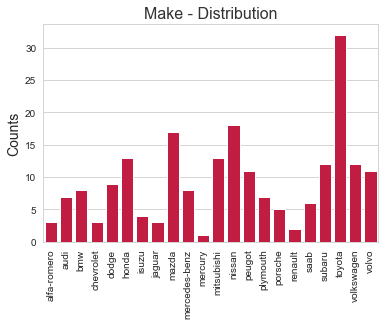

In [21]:
make_hist=sns.countplot(cars['make'], color=plot_color)
make_hist.set_xticklabels(make_hist.get_xticklabels(), rotation=90)
make_hist.set_xlabel('')
make_hist.set_ylabel('Counts', fontsize=14)

ax = make_hist.axes
ax.patch.set_alpha(0)
ax.set_title('Make - Distribution', fontsize=16, color="#333333")
fig = make_hist.get_figure()
fig.figsize=(10,5)
fig.patch.set_alpha(0.5)
fig.savefig('01make_distribution.png',dpi=fig.dpi,bbox_inches='tight')


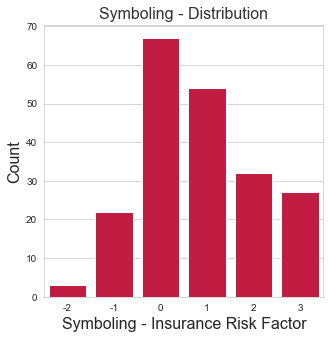

In [22]:
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects for a 3x2 subplot figure

fig.patch.set_alpha(0.5)
ax.set_title("Symboling - Distribution", y = y_title_margin, color=title_color,fontsize=16)

#Set transparency for individual subplots.
ax.patch.set_alpha(0.5)

symbol_hist=sns.countplot(cars["symboling"], color=plot_color, ax=ax )
#symbol_hist.set_xticklabels(symbol_hist.get_xticklabels(), rotation=90,fontsize=12)
symbol_hist.set_ylabel('Count',fontsize=16 )
symbol_hist.set_xlabel('Symboling - Insurance Risk Factor',fontsize=16)

#plt.show()
fig.savefig('02symboling_distribution.png',dpi=fig.dpi,bbox_inches='tight')


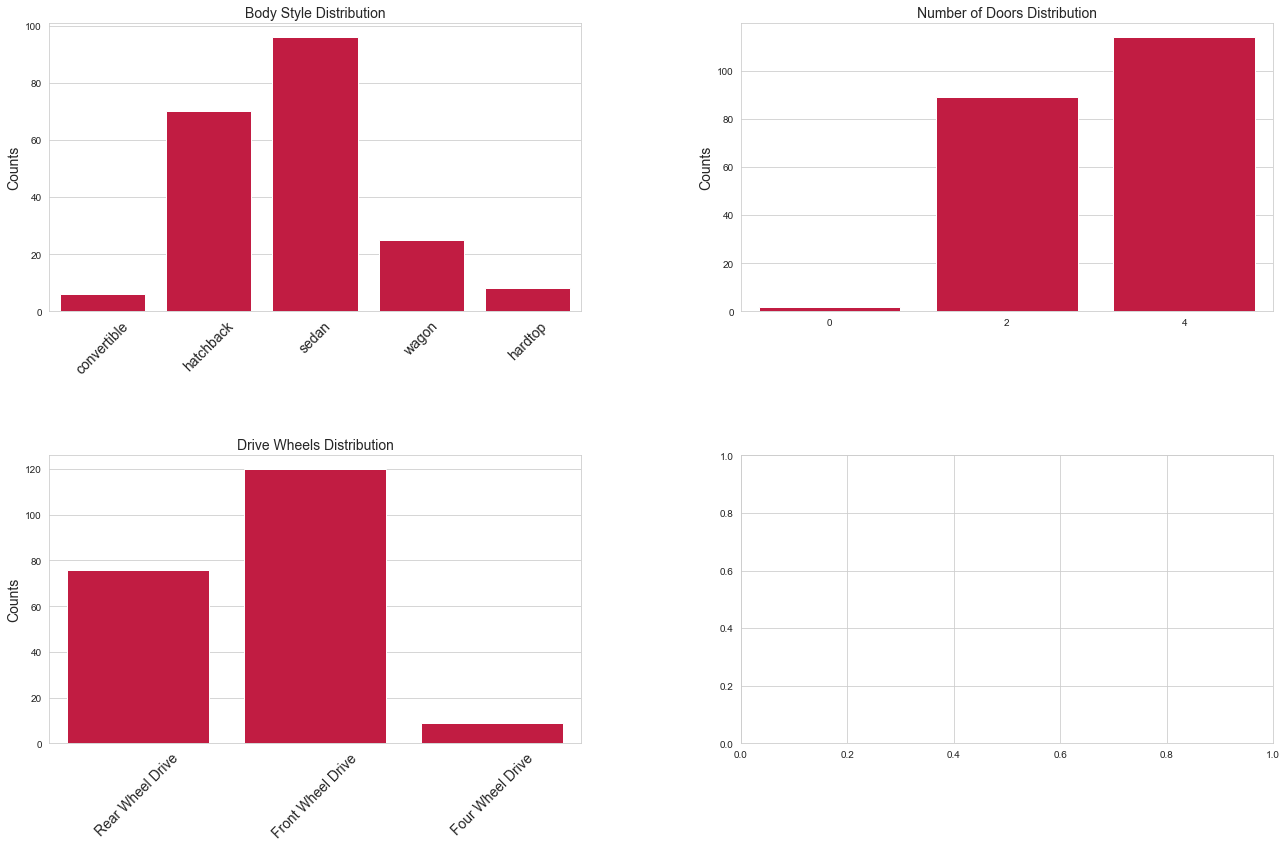

In [23]:
plot_color = "#dd0033"
title_color = "#333333"

fig, ax = plt.subplots(figsize=(20,20), ncols=2, nrows=2)

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  0.6, 
    wspace  =  0.3, 
    hspace  =  0.5
)

fig.patch.set_alpha(0.5)

ax[0][0].set_title('Body Style Distribution', fontsize=14)
ax[0][0].set_alpha(0)

bstyle_dist=sns.countplot(cars['body-style'],color=plot_color, ax=ax[0][0])
bstyle_dist.set_xticklabels(bstyle_dist.get_xticklabels(),rotation=45, fontsize=14)
bstyle_dist.set_xlabel('')
bstyle_dist.set_ylabel('Counts', fontsize=14)

ax[0][1].set_title('Number of Doors Distribution', fontsize=14)
ax[0][1].set_alpha(0)

numdoors_dist=sns.countplot(cars['num_doors'],color=plot_color, ax=ax[0][1])
numdoors_dist.set_xlabel('')
numdoors_dist.set_ylabel('Counts', fontsize=14)

ax[1][0].set_title('Drive Wheels Distribution', fontsize=14)
ax[1][0].set_alpha(0)

drvwheels_dist=sns.countplot(cars['drive-wheels'],color=plot_color, ax=ax[1][0])
drvwheels_dist.set_xticklabels(drvwheels_dist.get_xticklabels(),rotation=45, fontsize=14)
drvwheels_dist.set_xlabel('')
drvwheels_dist.set_ylabel('Counts', fontsize=14)

fig.savefig('03categorical_vars_distribution.png',dpi=fig.dpi,bbox_inches='tight')

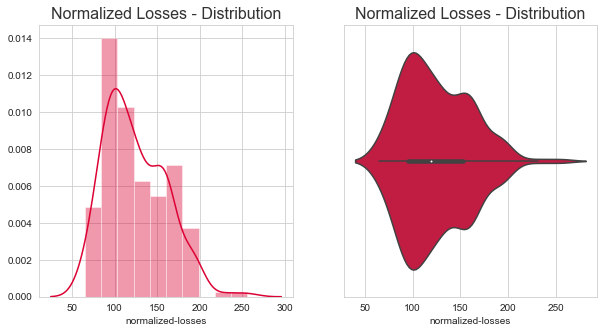

In [43]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Normalized Losses - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

normloss_hist=sns.distplot(cars["normalized-losses"], color=plot_color, ax=ax[0] )
#symbol_hist.set_xticklabels(symbol_hist.get_xticklabels(), rotation=90,fontsize=12)
#symbol_hist.set_ylabel('Count',fontsize=16 )
symbol_hist.set_xlabel('Normalized Losses',fontsize=16)

ax[1].set_title("Normalized Losses - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
normloss_hist=sns.violinplot(cars["normalized-losses"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('04normalized_losses_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [44]:
cars['normalized-losses'].describe()

count    183.000000
mean     124.274446
std       35.718009
min       65.000000
25%       95.000000
50%      119.000000
75%      153.000000
max      256.000000
Name: normalized-losses, dtype: float64

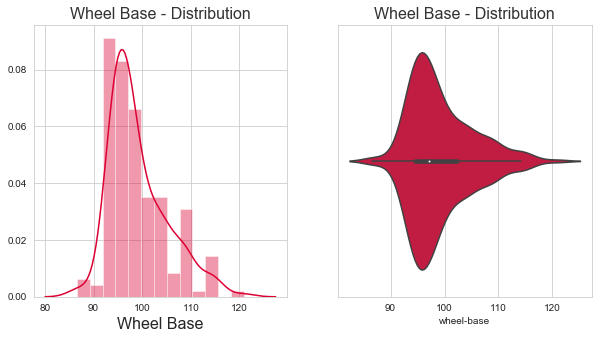

In [45]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Wheel Base - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

wbase_hist=sns.distplot(cars["wheel-base"], hist=True, color=plot_color, ax=ax[0] )
#symbol_hist.set_xticklabels(symbol_hist.get_xticklabels(), rotation=90,fontsize=12)
#symbol_hist.set_ylabel('Count',fontsize=16 )
wbase_hist.set_xlabel('Wheel Base',fontsize=16)

ax[1].set_title("Wheel Base - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
wbase_box=sns.violinplot(cars["wheel-base"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('05wheelbase_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [46]:
cars['wheel-base'].describe()

count    183.000000
mean      99.145355
std        5.979826
min       86.600000
25%       94.500000
50%       97.200000
75%      102.400000
max      120.900000
Name: wheel-base, dtype: float64

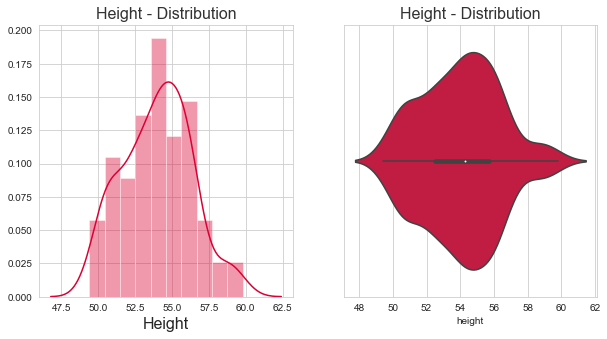

In [47]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Height - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

height_hist=sns.distplot(cars["height"], hist=True, color=plot_color, ax=ax[0] )
height_hist.set_xlabel('Height',fontsize=16)

ax[1].set_title("Height - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
height_box=sns.violinplot(cars["height"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('06height_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [48]:

cars['height'].describe()

count    183.000000
mean      54.009836
std        2.328635
min       49.400000
25%       52.500000
50%       54.300000
75%       55.700000
max       59.800000
Name: height, dtype: float64

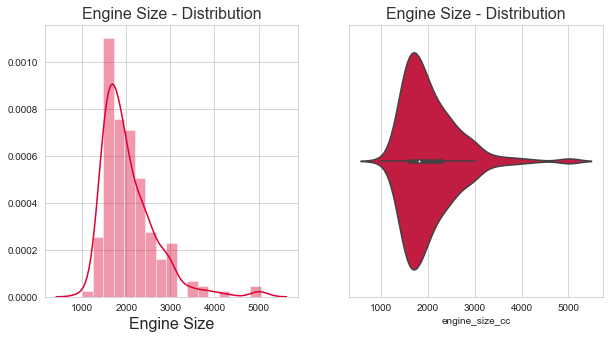

In [49]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Engine Size - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

enginesize_hist=sns.distplot(cars["engine_size_cc"], hist=True, color=plot_color, ax=ax[0] )
enginesize_hist.set_xlabel('Engine Size',fontsize=16)

ax[1].set_title("Engine Size - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
enginesize_box=sns.violinplot(cars["engine_size_cc"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('07enginesize_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [52]:
print("Mode:" + str(cars["engine_size_cc"].mode()))
print(cars["engine_size_cc"].describe())

Mode:0    1507
dtype: int64
count     183.000000
mean     2051.038251
std       619.911154
min       999.000000
25%      1597.000000
50%      1802.000000
75%      2310.000000
max      5047.000000
Name: engine_size_cc, dtype: float64


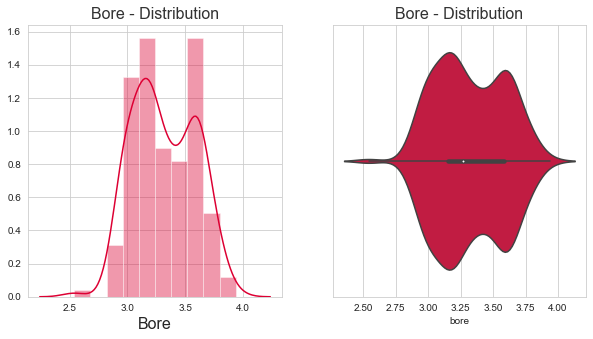

In [62]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Bore - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

bore_hist=sns.distplot(cars["bore"], hist=True, color=plot_color, ax=ax[0] )
#symbol_hist.set_xticklabels(symbol_hist.get_xticklabels(), rotation=90,fontsize=12)
#symbol_hist.set_ylabel('Count',fontsize=16 )
bore_hist.set_xlabel('Bore',fontsize=16)

ax[1].set_title("Bore - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
bore_box=sns.violinplot(cars["bore"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('08bore_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [63]:

print("Mode:" + str(cars["bore"].mode()))
print(cars["bore"].describe())
#cars["bore"].value_counts()

Mode:0    3.62
dtype: float64
count    183.000000
mean       3.319180
std        0.266755
min        2.540000
25%        3.150000
50%        3.270000
75%        3.580000
max        3.940000
Name: bore, dtype: float64


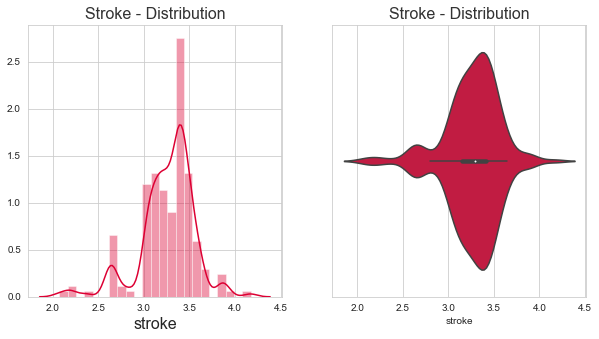

In [64]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Stroke - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

stroke_hist=sns.distplot(cars["stroke"], hist=True, color=plot_color, ax=ax[0] )
stroke_hist.set_xlabel('stroke',fontsize=16)

ax[1].set_title("Stroke - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
stroke_box=sns.violinplot(cars["stroke"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('09stroke_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [65]:
print("Mode:" + str(cars["stroke"].mode()[0]))
print("Median:" + str(cars["stroke"].median()))

print(cars["stroke"].describe())
#cars["stroke"].value_counts()

Mode:3.4
Median:3.29
count    183.000000
mean       3.258962
std        0.305088
min        2.070000
25%        3.150000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64


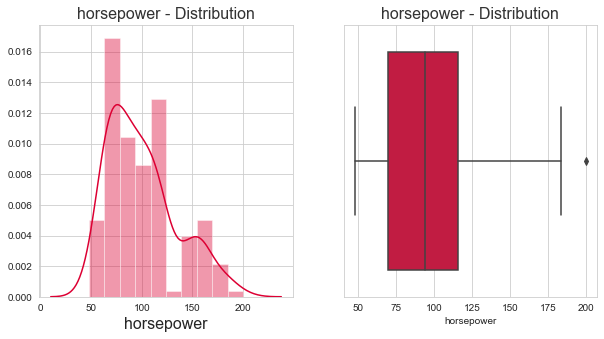

In [66]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("horsepower - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

hp_hist=sns.distplot(cars["horsepower"], hist=True, color=plot_color, ax=ax[0] )
hp_hist.set_xlabel('horsepower',fontsize=16)

ax[1].set_title("horsepower - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
hp_box=sns.boxplot(cars["horsepower"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('10horsepower_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [67]:
print("Mode:" + str(cars["horsepower"].mode()[0]))
print("Median:" + str(cars["horsepower"].median()))

print(cars["horsepower"].describe())
#cars["stroke"].value_counts()

Mode:68
Median:94.0
count    183.000000
mean     100.295082
std       33.713080
min       48.000000
25%       70.000000
50%       94.000000
75%      116.000000
max      200.000000
Name: horsepower, dtype: float64


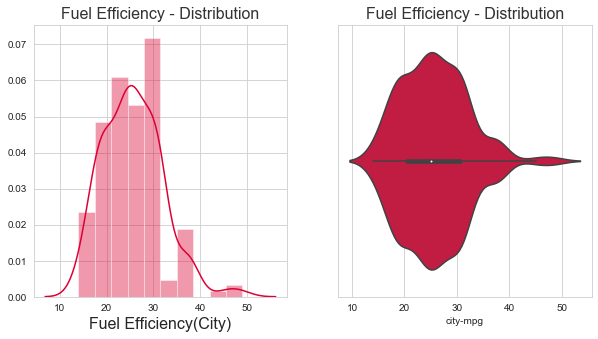

In [68]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Fuel Efficiency - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

citympg_hist=sns.distplot(cars["city-mpg"], hist=True, color=plot_color, ax=ax[0] )
citympg_hist.set_xlabel('Fuel Efficiency(City)',fontsize=16)

ax[1].set_title("Fuel Efficiency - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
citympg_box=sns.violinplot(cars["city-mpg"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('11citympg_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [69]:

print("Mode:" + str(cars["city-mpg"].mode()[0]))
print("Median:" + str(cars["city-mpg"].median()))

print(cars["city-mpg"].describe())
#cars["city-mpg"].value_counts()

Mode:31
Median:25.0
count    183.000000
mean      25.666667
std        6.338729
min       14.000000
25%       20.500000
50%       25.000000
75%       30.500000
max       49.000000
Name: city-mpg, dtype: float64


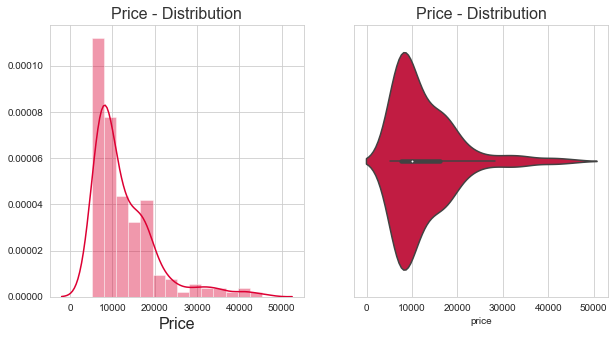

In [70]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Price - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

price_hist=sns.distplot(cars["price"], hist=True, color=plot_color, ax=ax[0] )
price_hist.set_xlabel('Price',fontsize=16)

ax[1].set_title("Price - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
normloss_hist=sns.violinplot(cars["price"], color=plot_color, ax=ax[1] )

#plt.show()
fig.savefig('12price_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [71]:
print("Mode:" + str(cars["price"].mode()[0]))
print("Median:" + str(cars["price"].median()))

print(cars["price"].describe())
#cars["price"].value_counts()

Mode:5572.0
Median:9988.0
count      183.000000
mean     12709.858834
std       7438.115517
min       5118.000000
25%       7649.000000
50%       9988.000000
75%      16214.000000
max      45400.000000
Name: price, dtype: float64


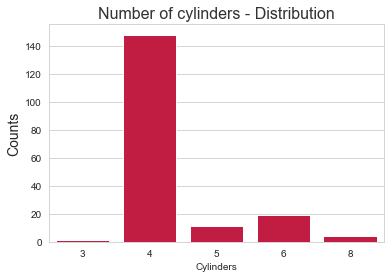

In [72]:
ncyl_hist=sns.countplot(cars['num_cylinders'], color=plot_color)
ncyl_hist.set_xlabel('Cylinders')
ncyl_hist.set_ylabel('Counts', fontsize=14)

ax = ncyl_hist.axes
ax.patch.set_alpha(0)
ax.set_title('Number of cylinders - Distribution', fontsize=16, color="#333333")
fig = ncyl_hist.get_figure()
fig.figsize=(10,5)
fig.patch.set_alpha(0.5)
fig.savefig('13numcylinders_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [73]:
print("Mode:" + str(cars["num_cylinders"].mode()[0]))
print("Median:" + str(cars["num_cylinders"].median()))

print(cars["num_cylinders"].describe())
#cars["num_cylinders"].value_counts()

Mode:4
Median:4.0
count    183.000000
mean       4.349727
std        0.843910
min        3.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        8.000000
Name: num_cylinders, dtype: float64


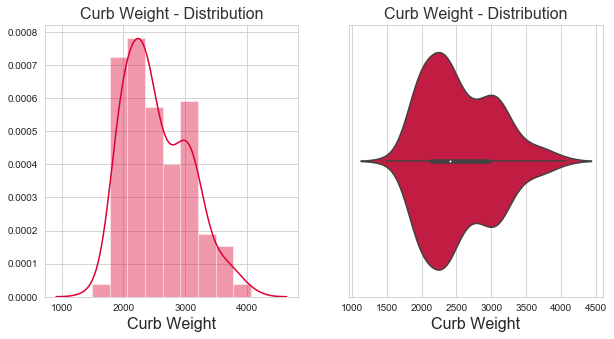

In [74]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1) 

fig.patch.set_alpha(0.5)
ax[0].set_title("Curb Weight - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

cweight_hist=sns.distplot(cars["curb-weight"], hist=True, color=plot_color, ax=ax[0] )
cweight_hist.set_xlabel('Curb Weight',fontsize=16)

ax[1].set_title("Curb Weight - Distribution", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)
cweight_box=sns.violinplot(cars["curb-weight"], color=plot_color, ax=ax[1] )
cweight_box.set_xlabel('Curb Weight',fontsize=16)

#plt.show()
fig.savefig('12curbweight_distribution.png',dpi=fig.dpi,bbox_inches='tight')

In [75]:
print("Mode:" + str(cars["curb-weight"].mode()[0]))
print("Median:" + str(cars["curb-weight"].median()))

print(cars["curb-weight"].describe())
#cars["curb-weight"].value_counts()


Mode:1918
Median:2405.0
count     183.000000
mean     2542.054645
std       518.033610
min      1488.000000
25%      2128.000000
50%      2405.000000
75%      2964.500000
max      4066.000000
Name: curb-weight, dtype: float64


#Body style, body size and engine specs play an important role in arriing at the market price of a car.

In [77]:

cars = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Automobile_data.csv")

In [82]:
features = cars.columns
for x in features:
    if ('?' in cars[x].unique()) or ('l' in cars[x].unique()):
        ct = cars[cars[x].isin(['?','l'])].shape[0]
        print(x + " - " + str(ct))

normalized-losses - 41
num-of-doors - 2
engine-type - 12
bore - 4
stroke - 4
horsepower - 2
peak-rpm - 2
price - 4


In [83]:
#Impute number of doors for missing cells
cars.loc[cars['num-of-doors'] == '?', 'num-of-doors'] = 'four'

In [84]:
x=cars.groupby(by='engine-type')['engine-type'].count().reset_index(name='count').sort_values('count', ascending=False).reset_index(drop=True)
cars.loc[cars['engine-type']=='l', 'engine-type'] = x.iloc[0,0]

In [85]:
def calc_num_cylinders(cylstr):
    cyls = {'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12}
    if(cylstr in cyls.keys()):
        return cyls[cylstr]
    return 0

cars['num_cylinders'] = cars['num-of-cylinders'].apply(lambda x: calc_num_cylinders(x))

def calc_num_doors (doorstr):
    if(doorstr == 'two'):
       return 2 
    if (doorstr =='four'):
       return 4
    return 0
       
cars['num_doors'] = cars['num-of-doors'].apply(lambda x: calc_num_doors (x))

In [86]:
cars.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'volume', 'isrisky', 'isrisky10',
       'num_cylinders', 'num_doors'],
      dtype='object')

In [87]:
#impute a NaN alue in a column with the mean value of the specified group
def impute_groupmean(df,grpby,feature):
    #grpby='body-style'
    #feature = 'horsepower'
    #print(type(df))
    df=df.merge(df.groupby(by=grpby, as_index=False)[feature].mean(), left_on=grpby, right_on=grpby, how="inner", suffixes=['', '_right'])
    df[feature] = np.where(df[feature].isnull(),df[feature+'_right'],df[feature])
    df.drop(feature+'_right', axis=1, inplace=True)
    return df


#
# Update horsepower figures having ? values with mean of the group(body-style)
#
cars['horsepower'] = pd.to_numeric(cars['horsepower'], errors='coerce')
cars=impute_groupmean(cars,'body-style','horsepower')
#Update bore alue
cars['bore'] = pd.to_numeric(cars['bore'], errors='coerce')
cars=impute_groupmean(cars,'num_cylinders','bore')
#Stroke
cars['stroke'] = pd.to_numeric(cars['stroke'], errors='coerce')
cars=impute_groupmean(cars,'num_cylinders','stroke')
#peak-rpm
cars['peak-rpm'] = pd.to_numeric(cars['peak-rpm'], errors='coerce')
cars=impute_groupmean(cars,'num_cylinders','peak-rpm')
#price
cars['price'] = pd.to_numeric(cars['price'], errors='coerce')
cars=impute_groupmean(cars,'body-style','price')

In [88]:
plot_color = "#dd0033"
palette = ["#FFA07A","#FF0000", "#dd0033","#800000","#DB7093"]
figalpha = 0.5
axalpha = 0

left   =  0.10  # the left side of the subplots of the figure
right  =  0.95    # the right side of the subplots of the figure
bottom =  0.2    # the bottom of the subplots of the figure
top    =  0.3    # the top of the subplots of the figure
wspace =  0.1     # the amount of width reserved for blank space between subplots
hspace = 0.1 # the amount of height reserved for white space between subplots
y_title_margin = 1.0 # The amount of space above titles

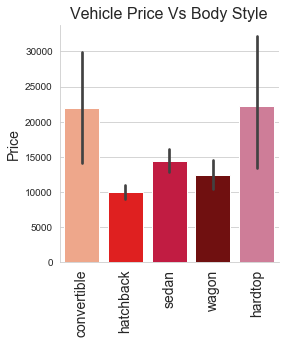

In [90]:
plot_color = "#dd0033"
palette = ["#FFA07A","#FF0000", "#dd0033","#800000","#DB7093"]

gax1=sns.factorplot(x="body-style",y="price", data=cars,kind="bar", palette=palette, hue="body-style", dodge=False,size=4, aspect=1,)

gax1.facet_axis(0,0).set_title("Vehicle Price Vs Body Style", fontsize=16)
gax1.facet_axis(0,0).set_ylabel("Price", fontsize=14)
gax1.facet_axis(0,0).set_xlabel("")
gax1.facet_axis(0,0).patch.set_alpha(axalpha)
gax1.facet_axis(0,0).set_xticklabels(gax1.facet_axis(0,0).get_xticklabels(), rotation=90, fontsize=14)
gax1.fig.patch.set_alpha(figalpha)
#plt.show()
gax1.fig.savefig('./graphs/price_01_price_bodystyle.png',dpi=gax1.fig.dpi,bbox_inches='tight')


Text(0.5, 0, '')

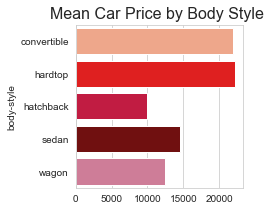

In [91]:
plot_color = "#dd0033"
palette = ["#FFA07A","#FF0000", "#dd0033","#800000","#DB7093"]

fig, ax = plt.subplots(figsize=(3,3), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0)
ax.set_title("Mean Car Price by Body Style ", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

grp1=cars.groupby('body-style')['price'].mean().reset_index()

gax=sns.barplot(y='body-style', x='price', data=grp1, palette=palette, ax=ax)
ax.set_xlabel('Mean Price',fontsize=14 )
ax.set_xlabel('',fontsize=14)
#gax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=14)

[Text(0, 0, 'convertible'),
 Text(0, 0, 'hardtop'),
 Text(0, 0, 'hatchback'),
 Text(0, 0, 'sedan'),
 Text(0, 0, 'wagon')]

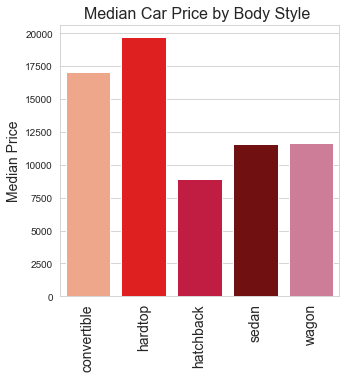

In [92]:
#cars.groupby('body-style')['price'].median()
plot_color = "#dd0033"
palette = ["#FFA07A","#FF0000", "#dd0033","#800000","#DB7093"]

fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Median Car Price by Body Style ", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

grp1=cars.groupby('body-style')['price'].median().reset_index()

gax=sns.barplot(x='body-style', y='price', data=grp1, palette=palette, ax=ax)
ax.set_ylabel('Median Price',fontsize=14 )
ax.set_xlabel('',fontsize=14)
gax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=14)

In [93]:
cars['volume']=cars['height']*cars['length']*cars['width']

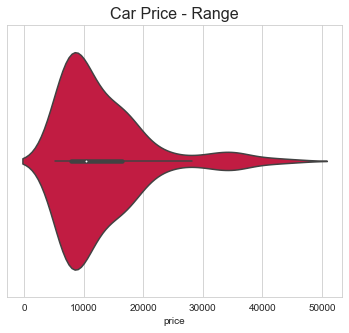

In [94]:
fig, ax = plt.subplots(figsize=(6,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Car Price - Range", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

sns.violinplot(x=cars['price'], color=plot_color)

In [95]:
cars[['num_cylinders','price','wheel-base','length','height','width','engine-size','num_doors','stroke','bore','compression-ratio','horsepower','peak-rpm','curb-weight','city-mpg']].corr()

,num_cylinders,price,wheel-base,length,height,width,engine-size,num_doors,stroke,bore,compression-ratio,horsepower,peak-rpm,curb-weight,city-mpg
num_cylinders,1.000000,0.678631,0.339507,0.430672,-0.013995,0.545007,0.846031,-0.019503,0.008578,0.243553,-0.020002,0.691565,-0.124268,0.609727,-0.445837
price,0.678631,1.000000,0.581379,0.679089,0.137255,0.718420,0.855652,0.046305,0.081341,0.527273,0.072382,0.744076,-0.103981,0.812971,-0.658374
wheel-base,0.339507,0.581379,1.000000,0.874587,0.589435,0.795144,0.569329,0.439635,0.161477,0.490378,0.249786,0.352445,-0.360591,0.776386,-0.470414
length,0.430672,0.679089,0.874587,1.000000,0.491029,0.841118,0.683360,0.385675,0.129739,0.607480,0.158414,0.553822,-0.287134,0.877728,-0.670909
height,-0.013995,0.137255,0.589435,0.491029,1.000000,0.279210,0.067149,0.540286,-0.056999,0.176195,0.261214,-0.110137,-0.320510,0.295572,-0.048640
width,0.545007,0.718420,0.795144,0.841118,0.279210,1.000000,0.735433,0.197735,0.182956,0.559204,0.181129,0.641805,-0.219934,0.867032,-0.642704
engine-size,0.846031,0.855652,0.569329,0.683360,0.067149,0.735433,1.000000,0.013919,0.206675,0.594090,0.028971,0.810505,-0.244630,0.850594,-0.653658
num_doors,-0.019503,0.046305,0.439635,0.385675,0.540286,0.197735,0.013919,1.000000,-0.006983,0.109945,0.171797,-0.128466,-0.240264,0.190720,-0.014271
stroke,0.008578,0.081341,0.161477,0.129739,-0.056999,0.182956,0.206675,-0.006983,1.000000,-0.055909,0.186170,0.085985,-0.069751,0.168929,-0.042906
bore,0.243553,0.527273,0.490378,0.607480,0.176195,0.559204,0.594090,0.109945,-0.055909,1.000000,0.005203,0.576017,-0.263912,0.649045,-0.594584


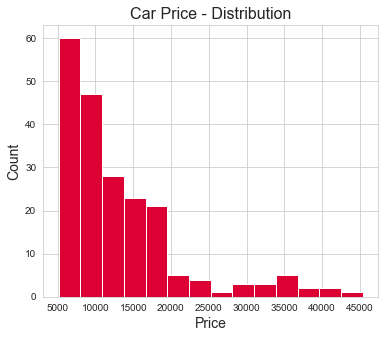

In [96]:
fig, ax = plt.subplots(figsize=(6,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Car Price - Distribution", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax2=sns.distplot(cars["price"], kde=False, ax=ax, color=plot_color, hist_kws=dict(alpha=1))
gax2.set_ylabel('Count',fontsize=14 )
gax2.set_xlabel('Price',fontsize=14)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.savefig('./graphs/price_02_price_dist.png',dpi=fig.dpi,bbox_inches='tight')

#### Majority of cars belong to the lower price brackets (< 20K) een though there are cars that go upto 45K

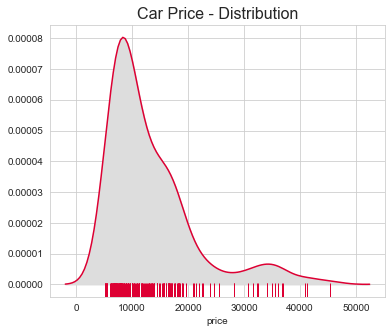

In [97]:
fig, ax = plt.subplots(figsize=(6,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0)
ax.set_title("Car Price - Distribution", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

ax=sns.distplot(cars['price'],hist=False,rug=True,norm_hist=True, color=plot_color,ax=ax)

# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
ax.fill_between(x1,y1, color="#dddddd", alpha=1)

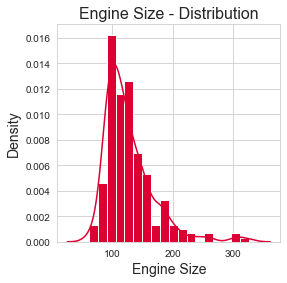

In [98]:
fig, ax = plt.subplots(figsize=(4,4), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Engine Size - Distribution", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax3=sns.distplot(cars["engine-size"], kde=True,ax=ax, color=plot_color, hist_kws=dict(alpha=1))
gax3.set_ylabel('Density',fontsize=14 )
gax3.set_xlabel('Engine Size',fontsize=14)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.savefig('./graphs/enginesize_01_dist.png',dpi=fig.dpi,bbox_inches='tight')

In [99]:
cars['engine-size'].describe()

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: engine-size, dtype: float64

##Right skewed engine size distribution. Majority of cars utilise smaller engines.

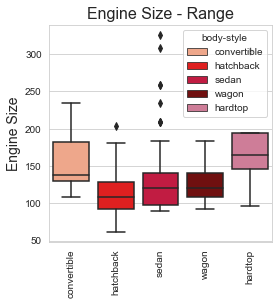

In [101]:
fig, ax = plt.subplots(figsize=(4,4), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Engine Size - Range", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax4=sns.boxplot(x="body-style",y="engine-size",data=cars, palette=palette, hue="body-style", dodge=False, ax=ax)

gax4.set_ylabel('Engine Size',fontsize=14 )
gax4.set_xlabel('',fontsize=14)
gax4.set_xticklabels(gax4.get_xticklabels(), rotation=90)
fig.savefig('./graphs/enginesize_02_range.png',dpi=fig.dpi,bbox_inches='tight')

In [102]:
cars[['make','body-style','engine-size','num_cylinders']].sort_values('engine-size', ascending=False).head()

,make,body-style,engine-size,num_cylinders
171,jaguar,sedan,326,12
150,mercedes-benz,sedan,308,8
201,mercedes-benz,hardtop,304,8
158,jaguar,sedan,258,6
157,jaguar,sedan,258,6


In [103]:

cars[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.855652
price,0.855652,1.000000


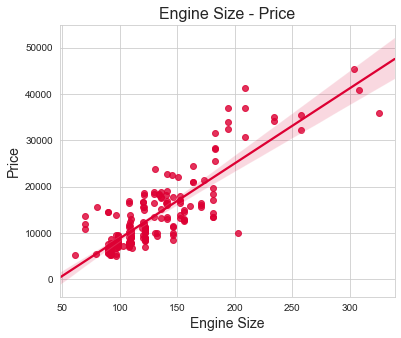

In [104]:
fig, ax = plt.subplots(figsize=(6,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Engine Size - Price", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax5=sns.regplot("engine-size",'price', data=cars, color=plot_color, ax=ax)
gax5.set_ylabel('Price',fontsize=14 )
gax5.set_xlabel('Engine Size',fontsize=14)
#gax5.set_xticklabels(gax5.get_xticklabels(), rotation=90)
fig.savefig('./graphs/enginesize_02_price.png',dpi=fig.dpi,bbox_inches='tight')

In [110]:

fig.patch.set_alpha(0.5)
ax.set_title("Horsepower - Distribution", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax6=sns.distplot(cars['horsepower'],kde=True, ax=ax, color=plot_color, hist_kws=dict(alpha=1))

gax6.set_ylabel('Density',fontsize=14 )
gax6.set_xlabel('Horsepower',fontsize=14)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.savefig('./graphs/horsepower_01_dist.png',dpi=fig.dpi,bbox_inches='tight')

In [107]:

cars['horsepower'].describe()

count    205.000000
mean     104.210163
std       39.522339
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

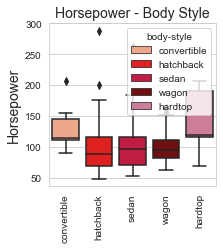

In [108]:
fig, ax = plt.subplots(figsize=(3,3), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Horsepower - Body Style", y = y_title_margin, fontsize=14)
ax.patch.set_alpha(0)

gax7=sns.boxplot(x="body-style", y="horsepower", data=cars, palette=palette, hue="body-style",dodge=False)
gax7.set_ylabel('Horsepower',fontsize=14 )
gax7.set_xlabel('',fontsize=14)
gax7.set_xticklabels(gax7.get_xticklabels(), rotation=90)
fig.savefig('./graphs/horsepower_02_range.png',dpi=fig.dpi,bbox_inches='tight')

In [111]:
cars[['make','body-style','engine-size','num_cylinders','horsepower']].sort_values('horsepower', ascending=False).head()

,make,body-style,engine-size,num_cylinders,horsepower
63,porsche,hatchback,203,8,288.0
171,jaguar,sedan,326,12,262.0
5,porsche,convertible,194,6,207.0
203,porsche,hardtop,194,6,207.0
202,porsche,hardtop,194,6,207.0


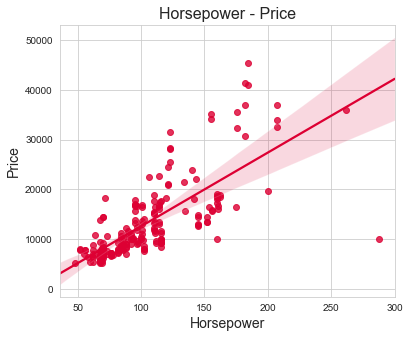

In [112]:
fig, ax = plt.subplots(figsize=(6,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Horsepower - Price", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax8=sns.regplot("horsepower",'price', data=cars, color=plot_color)
gax8.set_ylabel('Price',fontsize=14 )
gax8.set_xlabel('Horsepower',fontsize=14)
#gax8.set_xticklabels(gax8.get_xticklabels(), rotation=90)
fig.savefig('./graphs/horsepower_02_price.png',dpi=fig.dpi,bbox_inches='tight')

In [116]:
cars['power2weight'] = cars['horsepower']/cars['curb-weight']

In [114]:
cars[['power2weight','price']].corr()

,power2weight,price
power2weight,1.000000,0.468071
price,0.468071,1.000000


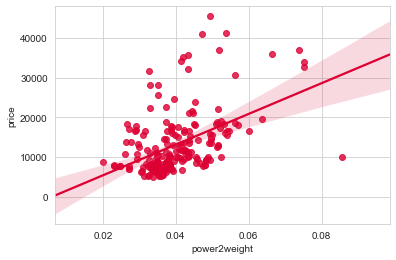

In [115]:
sns.regplot("power2weight",'price', data=cars, color=plot_color)

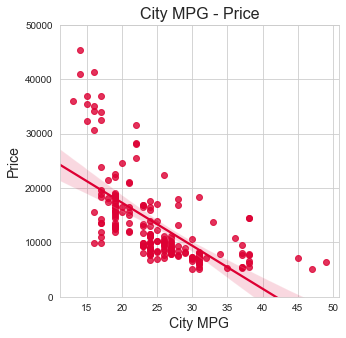

In [117]:
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("City MPG - Price", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax9=sns.regplot(x='city-mpg', y='price',data=cars,color=plot_color)
gax9.set_ylabel('Price',fontsize=14 )
gax9.set_xlabel('City MPG',fontsize=14)
#gax9.set_xticklabels(gax9.get_xticklabels(), rotation=90)
gax9.set_ylim(0,50000)
fig.savefig('./graphs/cityMPG_02_price.png',dpi=fig.dpi,bbox_inches='tight')

In [118]:

cars[['city-mpg','price']].corr()

,city-mpg,price
city-mpg,1.000000,-0.658374
price,-0.658374,1.000000


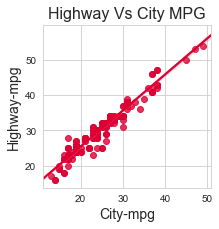

In [119]:
fig, ax = plt.subplots(figsize=(3,3), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Highway Vs City MPG", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax=sns.regplot("city-mpg",'highway-mpg', data=cars, color=plot_color)
gax.set_ylabel('Highway-mpg',fontsize=14 )
gax.set_xlabel('City-mpg',fontsize=14)
#gax.set_xticklabels(gax.get_xticklabels(), rotation=90)
fig.savefig('./graphs/highwaympg_01_citympg.png',dpi=fig.dpi,bbox_inches='tight')

In [120]:
cars[["city-mpg",'highway-mpg']].corr()

,city-mpg,highway-mpg
city-mpg,1.000000,0.971337
highway-mpg,0.971337,1.000000


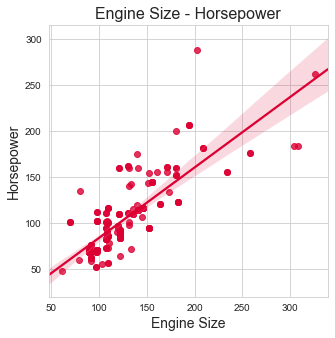

In [121]:
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Engine Size - Horsepower", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)
gax=sns.regplot("engine-size",'horsepower', data=cars, color=plot_color, order=1)

gax.set_ylabel('Horsepower',fontsize=14 )
gax.set_xlabel('Engine Size',fontsize=14)
#gax.set_xticklabels(gax.get_xticklabels(), rotation=90)
fig.savefig('./graphs/enginesize_02_horsepower.png',dpi=fig.dpi,bbox_inches='tight')

In [122]:
cars[["engine-size",'horsepower']].corr()

,engine-size,horsepower
engine-size,1.000000,0.810505
horsepower,0.810505,1.000000


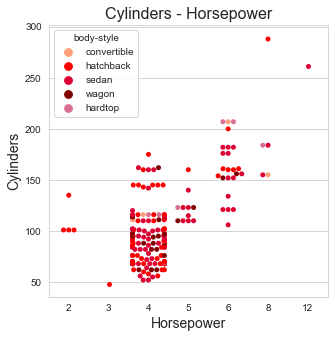

In [123]:
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Cylinders - Horsepower", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax=sns.swarmplot("num_cylinders",'horsepower', data=cars, palette=palette, hue="body-style")

gax.set_ylabel('Cylinders',fontsize=14 )
gax.set_xlabel('Horsepower',fontsize=14)
#gax.set_xticklabels(gax.get_xticklabels(), rotation=90)
fig.savefig('./graphs/cylinder_01_horsepower.png',dpi=fig.dpi,bbox_inches='tight')

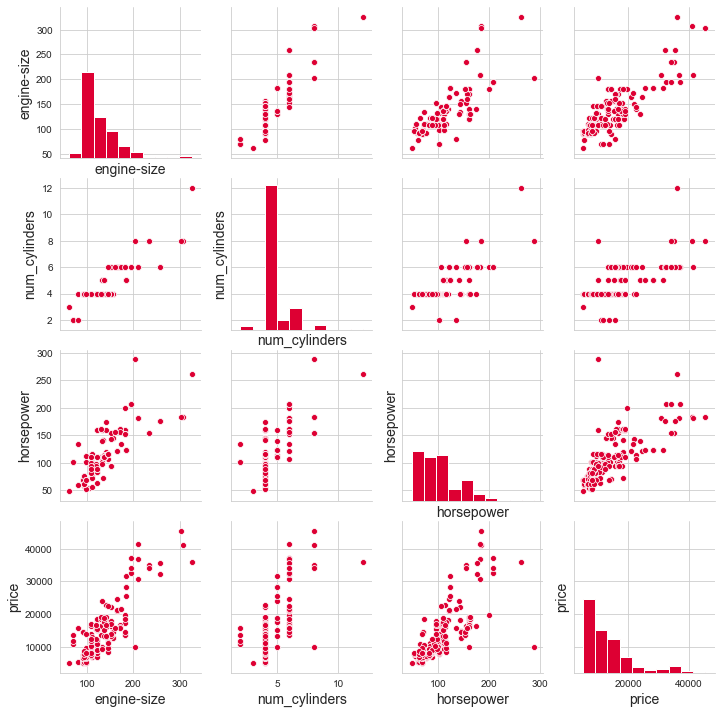

In [124]:
gplt= sns.pairplot(cars[['make','body-style','engine-size','num_cylinders','horsepower', 'price']], kind='scatter', diag_kind='hist',diag_kws=dict(color=plot_color, linewidth=1),plot_kws=dict(color=plot_color))

xlabels,ylabels = [],[]
gplt.fig.patch.set_alpha(figalpha)

for ax in gplt.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in gplt.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        gplt.axes[j,i].patch.set_alpha(0)
        gplt.axes[j,i].xaxis.set_label_text(xlabels[i], fontsize=14)
        gplt.axes[j,i].yaxis.set_label_text(ylabels[j], fontsize=14)

#dir(gplt)       
gplt.fig.savefig('./graphs/pairplot_enginespecs.png',dpi=fig.dpi,bbox_inches='tight')

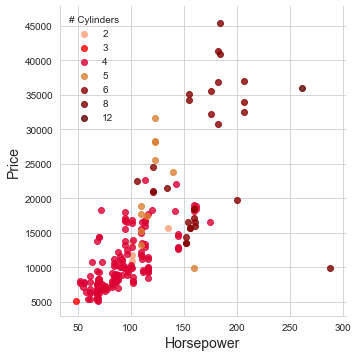

In [125]:
palette = ["#FFA07A","#FF0000", "#dd0033","#DB8033", "#880000", "#800000", "#600000"]
ax.set_title("Price - Horsepower", y = y_title_margin, fontsize=16)
gax=sns.lmplot(x="horsepower",y='price', data=cars,fit_reg=False, palette=palette, hue="num_cylinders",legend=False)
gax.facet_axis(0,0).patch.set_alpha(0)
gax.fig.patch.set_alpha(0)

gax.set_ylabels('Price',fontsize=14 )
gax.set_xlabels('Horsepower',fontsize=14)
gax.facet_axis(0,0).legend(loc="best",framealpha=0, title="# Cylinders")
#gax.fig.savefig('./graphs/horsepower_03_price.png',dpi=fig.dpi,bbox_inches='tight')

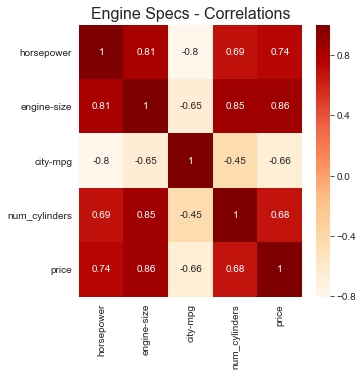

In [126]:
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Engine Specs - Correlations", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

sns.heatmap(cars[['horsepower', 'engine-size','city-mpg','num_cylinders','price']].corr(),cmap="OrRd",annot=True, ax=ax)
fig.savefig('./graphs/enginespecs_heatmap.png',dpi=fig.dpi,bbox_inches='tight')

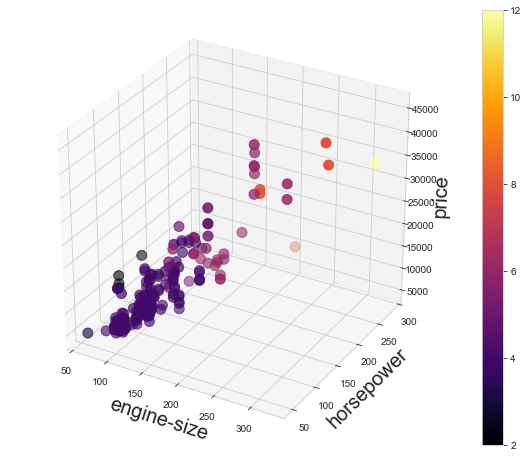

In [127]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pylab 

fig = plt.figure(figsize=(10,8))
fig.patch.set_alpha(0.5)

ax = fig.add_subplot(111, projection='3d')
ax.patch.set_alpha(0)

x = cars['engine-size']
y = cars['horsepower']
z = cars['price']
color = cars['num_cylinders']


cb1=ax.scatter(x, y, z, c=color, cmap=plt.cm.get_cmap('inferno'),s=100)
plt.colorbar(cb1, ax=ax)
ax.set_xlabel('engine-size',fontsize=20)
ax.set_ylabel('horsepower',fontsize=20)
ax.set_zlabel('price',fontsize=20)

fig.savefig('./graphs/enginespecs_price_3d.png',dpi=fig.dpi,bbox_inches='tight')
#plt.show()

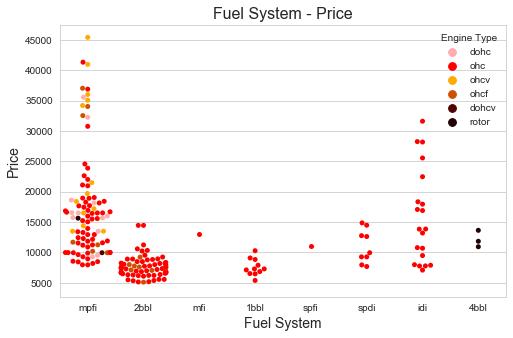

In [128]:
palette = ["#FFADAF","#FF0000", "#ffAA00","#D05000", "#500000", "#200000"]
fig, ax = plt.subplots(figsize=(8,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Fuel System - Price", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax=sns.swarmplot(x="fuel-system",y="price",data=cars, hue="engine-type", ax=ax, palette = palette)

gax.set_ylabel('Price',fontsize=14 )
gax.set_xlabel('Fuel System',fontsize=14)

gax.legend(loc="best",framealpha=0, title="Engine Type")
fig.savefig('./graphs/fuelsystem_price.png',dpi=fig.dpi,bbox_inches='tight')

#dir(gax)

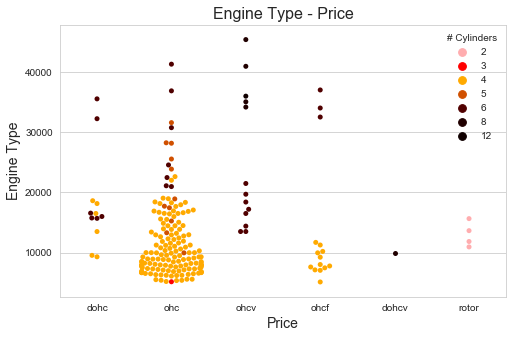

In [129]:
palette = ["#FFADAF","#FF0000", "#ffAA00","#D05000", "#500000", "#200000", "#100000"]
fig, ax = plt.subplots(figsize=(8,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Engine Type - Price", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax=sns.swarmplot(x="engine-type",y="price",data=cars, hue="num_cylinders", palette=palette, ax=ax)

gax.set_ylabel('Engine Type',fontsize=14 )
gax.set_xlabel('Price',fontsize=14)

gax.legend(loc="best",framealpha=0, title="# Cylinders")
fig.savefig('./graphs/enginetype_price.png',dpi=fig.dpi,bbox_inches='tight')

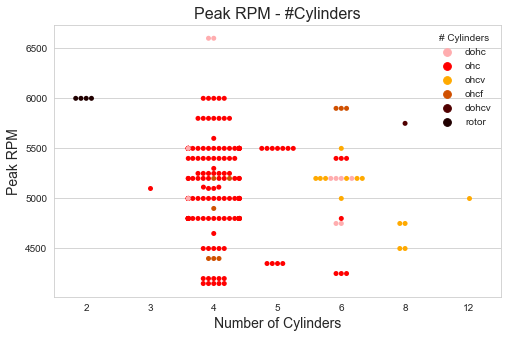

In [130]:
palette = ["#FFADAF","#FF0000", "#ffAA00","#D05000", "#500000", "#200000", "#100000"]
fig, ax = plt.subplots(figsize=(8,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Peak RPM - #Cylinders", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax=sns.swarmplot(x="num_cylinders",y="peak-rpm", hue="engine-type", data=cars,ax=ax,palette=palette)

gax.set_ylabel('Peak RPM',fontsize=14 )
gax.set_xlabel('Number of Cylinders',fontsize=14)

gax.legend(loc="best",framealpha=0, title="# Cylinders")
fig.savefig('./graphs/peakrpm_cylinders.png',dpi=fig.dpi,bbox_inches='tight')

In [131]:
cars['shadowarea'] = cars['length']*cars['width']/144 #Length x Width of ehicle conerted to sq.ft.

def calc_sizegroup(x):
    #print(str(x[0]) + ' ' + str(x[1]))
    if (x[0] > 1400 and x[0] < 2000):
        if(x[1] < 70.0): return 'Mini'
        if(x[1] >= 70.0 and x[1] <= 80.0): return 'Mini'
        if(x[1] >= 81.0 and x[1] <= 110.0): return 'Small'
        if(x[1] > 110 ): return 'Midsize'
        
    if (x[0] > 2000 and x[0] < 2501):
        if(x[1] < 70.0): return 'Mini'
        if(x[1] >= 70.0 and x[1] <= 80.0): return 'Mini'
        if(x[1] >= 81.0 and x[1] <= 110.0): return 'Small'
        if(x[1] > 110 ): return 'Midsize'
    if(x[0] > 2500 and x[0] < 3001):
        if(x[1] >= 70.0 and x[1] <= 90.0): return 'Small'
        if(x[1] > 90.0 ): return 'Midsize'
    if(x[0] > 3001 and x[0] < 3500):
        if(x[1] >= 70.0 and x[1] <= 80.0): return 'Small'
        if(x[1] > 80.0 and x[1] <= 100.0): return 'Midsize'
        if(x[1] > 100 ): return 'Large'
    if(x[0] > 3500 and x[0] < 4000):    
        if(x[1] >= 70.0 and x[1] <= 80.0): return 'Small'
        if(x[1] >= 81.0 and x[1] <= 90.0): return 'Midsize'
        if(x[1] >= 91.0 and x[1] <= 110.0): return 'Large'
        if(x[1] >= 110.0 ): return 'Very Large'
    if(x[0] > 4000 ):    
        if(x[1] >= 70.0 and x[1] <= 90.0): return 'Midsize'
        if(x[1] >= 91.0 and x[1] <= 100.0): return 'Large'
        if(x[1] >= 101.0 ): return 'Very Large'
        
        
        
#test = cars[['curb-weight', 'shadowarea']].head()

cars['sizegroup'] = cars[['curb-weight', 'shadowarea']].apply(lambda x: calc_sizegroup(x), axis=1 )   

#cars[cars['sizegroup'].isnull()][['curb-weight','shadowarea']]

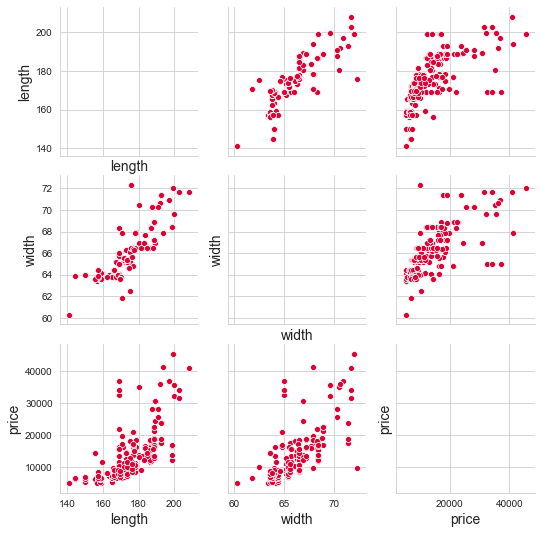

In [132]:
gplt=sns.pairplot(cars[['length','width','price']], kind="scatter",diag_kind='scatter',diag_kws=dict(color=plot_color, linewidth=1),plot_kws=dict(color=plot_color))

xlabels,ylabels = [],[]
gplt.fig.patch.set_alpha(figalpha)

for ax in gplt.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in gplt.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        gplt.axes[j,i].patch.set_alpha(0)
        gplt.axes[j,i].xaxis.set_label_text(xlabels[i], fontsize=14)
        gplt.axes[j,i].yaxis.set_label_text(ylabels[j], fontsize=14)

#dir(gplt)       
gplt.fig.savefig('./graphs/pairplot_bodysize.png',dpi=fig.dpi,bbox_inches='tight')

In [133]:
cars["sizegroup"].value_counts()

Mini       99
Small      57
Midsize    39
Large      10
Name: sizegroup, dtype: int64

Text(0.5, 0, 'Car Size')

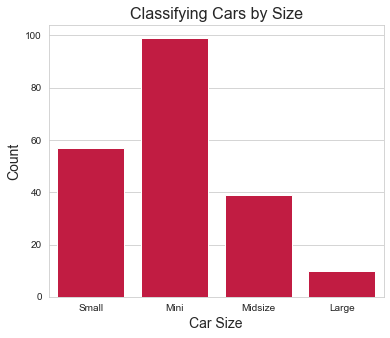

In [134]:
fig, ax = plt.subplots(figsize=(6,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Classifying Cars by Size", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax3=sns.countplot(cars["sizegroup"], ax=ax, color=plot_color)
gax3.set_ylabel('Count',fontsize=14 )
gax3.set_xlabel('Car Size',fontsize=14)

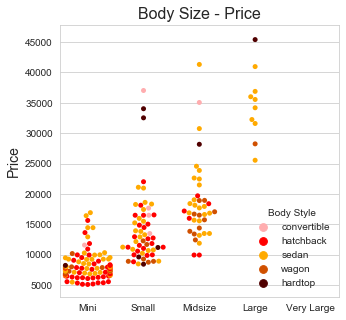

In [135]:
palette = ["#FFADAF","#FF0000", "#ffAA00","#D05000", "#500000", "#200000", "#100000"]

fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0)
ax.set_title("Body Size - Price", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax=sns.swarmplot("sizegroup",'price', data=cars, hue="body-style", order=['Mini','Small','Midsize', 'Large', 'Very Large'],palette=palette, ax=ax)

gax.set_ylabel('Price',fontsize=14 )
gax.set_xlabel('',fontsize=14)
gax.legend(loc="best",framealpha=0, title="Body Style")
#gax.set_xticklabels(gax.get_xticklabels(), rotation=90)
fig.savefig('./graphs/bodysize_price.png',dpi=fig.dpi,bbox_inches='tight')

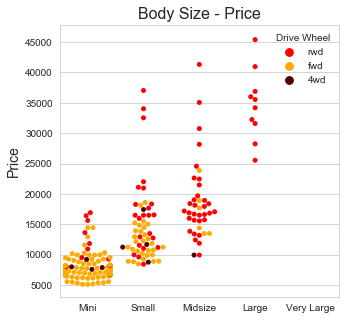

In [136]:
cars['drwheel'] = cars['drive-wheels'].map({"rwd": 1, "fwd": 2, "4wd": 3})

palette = ["#FF0000", "#ffAA00", "#500000", "#200000", "#100000"]

fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Body Size - Price", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax=sns.swarmplot(x="sizegroup",y="price",hue="drive-wheels",data=cars,order=['Mini','Small','Midsize', 'Large', 'Very Large'], palette=palette, ax=ax)

gax.set_ylabel('Price',fontsize=14 )
gax.set_xlabel('',fontsize=14)
gax.legend(loc="best",framealpha=0, title="Drive Wheel")
#gax.set_xticklabels(gax.get_xticklabels(), rotation=90)
fig.savefig('./graphs/bodysize_price_drive.png',dpi=fig.dpi,bbox_inches='tight')

In [137]:
#cars.groupby(by=['engine-size'])

def categ_price_bracket(x):
    if(x < 10000): return '< 10k'
    if(x < 20000): return '< 20k'
    if(x < 30000): return '< 30k'
    if(x < 40000): return '< 40k'
    if(x < 50000): return '< 50k'

cars['pricebracket'] = cars['price'].apply(lambda x: categ_price_bracket(x))
enginesummary=cars.groupby(by='pricebracket', as_index=False)['engine-size','horsepower','city-mpg'].mean()
enginesummary=enginesummary.melt('pricebracket', var_name='cols',  value_name='vals')
#enginesummary

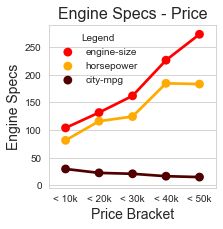

In [138]:
palette = ["#FF0000", "#ffAA00", "#500000", "#200000", "#100000"]

fig, ax = plt.subplots(figsize=(3,3), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Engine Specs - Price", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)

gax=sns.pointplot(x='pricebracket', y='vals', hue='cols',data=enginesummary, palette=palette)

gax.set_ylabel('Engine Specs',fontsize=14 )
gax.set_xlabel('Price Bracket',fontsize=14)
gax.legend(loc="best",framealpha=0, title="Legend")
#gax.set_xticklabels(gax.get_xticklabels(), rotation=90)
fig.savefig('./graphs/enginespecs_pricebracket.png',dpi=fig.dpi,bbox_inches='tight')

In [3]:
cars['volume']=cars['height']*cars['length']*cars['width']

###Risky and Safe

In [4]:
def categ_risk(x):
    if (x > 0):
        return 'risky'
    return 'safe'

def categ_risk_binary(x):
    if (x > 0):
        return 1
    return 0
    
cars['isrisky'] = cars['symboling'].apply(lambda x: categ_risk(x))
cars['isrisky10'] = cars['symboling'].apply(lambda x: categ_risk_binary(x))
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,volume,isrisky,isrisky10
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,528019.904,risky,1
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,528019.904,risky,1
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,587592.640,risky,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950,634816.956,risky,1
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450,636734.832,risky,1


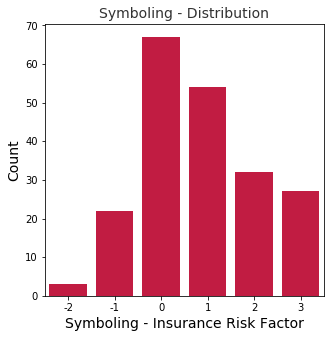

In [5]:
title_color = "#333333"
plot_color = "#dd0033"
y_title_margin = 1.0
palette = ["#FF0000","#ff8800"]
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects for a 3x2 subplot figure

fig.patch.set_alpha(0.5)
ax.set_title("Symboling - Distribution", y = y_title_margin, color=title_color,fontsize=14)
ax.patch.set_alpha(0)

symbol_hist=sns.countplot(cars["symboling"], color=plot_color, ax=ax )
symbol_hist.set_ylabel('Count',fontsize=14 )
symbol_hist.set_xlabel('Symboling - Insurance Risk Factor',fontsize=14)
#symbol_hist.set_xlim(left=-3,right=3)

fig.savefig('./graphs/symboling_dist.png',dpi=fig.dpi,bbox_inches='tight')

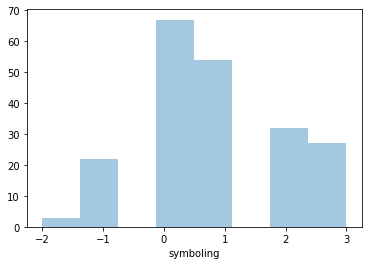

In [6]:
sns.distplot(cars['symboling'],kde=False)

[Text(0, 0, 'convertible'),
 Text(0, 0, 'hatchback'),
 Text(0, 0, 'sedan'),
 Text(0, 0, 'wagon'),
 Text(0, 0, 'hardtop')]

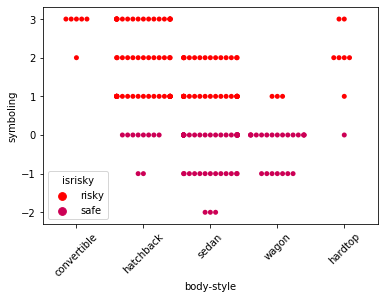

In [7]:
palette = ["#FF0000","#cc0055"]
sw1=sns.swarmplot(x="body-style",y="symboling",data=cars, hue="isrisky", palette=palette)
sw1.set_xticklabels(sw1.get_xticklabels(), rotation=45)

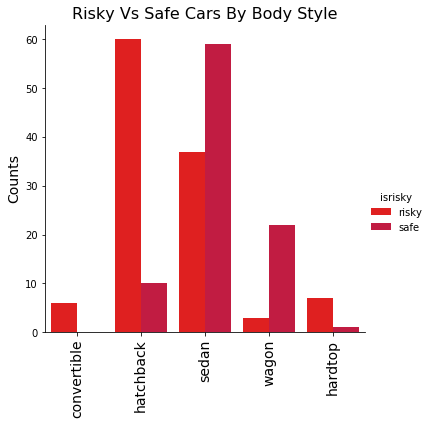

In [8]:
palette = ["#FF0000", "#dd0033"]
facet1=sns.factorplot(x="body-style",palette=palette,hue="isrisky",kind="count",data=cars)

facet1.facet_axis(0,0).set_title("Risky Vs Safe Cars By Body Style", fontsize=16)
facet1.facet_axis(0,0).set_ylabel("Counts", fontsize=14)
facet1.facet_axis(0,0).set_xlabel("")
facet1.facet_axis(0,0).patch.set_alpha(0)
facet1.facet_axis(0,0).set_xticklabels(facet1.facet_axis(0,0).get_xticklabels(), rotation=90, fontsize=14)
facet1.fig.patch.set_alpha(0.5)
#plt.show()
facet1.fig.savefig('./graphs/riskysafecounts_bodystyle.png',dpi=facet1.fig.dpi,bbox_inches='tight')

In [9]:
riskgrp = cars.groupby('isrisky')
riskgrpcnt = riskgrp.size().reset_index()
riskgrpcnt.columns=['RiskCategory','VehicleCount']
#riskgrpcnt
riskgrpmode = cars.groupby('isrisky')['symboling'].apply(lambda sym: stats.mode(sym)[0][0]).reset_index()
riskgrpmode.columns=['RiskCategory','SymbolingMode']
#riskgrpmode
riskgrpmodecnt = cars.groupby('isrisky')['symboling'].apply(lambda sym: stats.mode(sym)[1][0]).reset_index()
riskgrpmodecnt.columns=['RiskCategory','ModeCount']
#riskgrpmodecnt
riskgrpmedian = cars.groupby('isrisky')['symboling'].median().reset_index()
riskgrpmedian.columns=['RiskCategory','SymbolingMedian']
#riskgrpmedian

riskmodejoin = riskgrpcnt.merge(riskgrpmedian, how="inner", left_on="RiskCategory", right_on="RiskCategory", suffixes=['', '_right'])
riskmodejoin = riskmodejoin.merge(riskgrpmode, how='inner',left_on="RiskCategory", right_on="RiskCategory", suffixes=['', '_right'])
riskmodejoin = riskmodejoin.merge(riskgrpmodecnt, how="inner", left_on="RiskCategory", right_on="RiskCategory", suffixes=['', '_right'])

riskmodejoin

,RiskCategory,VehicleCount,SymbolingMedian,SymbolingMode,ModeCount
0,risky,113,2,1,54
1,safe,92,0,0,67


In [10]:
riskgrpcnt['Legend'] = 'VehicleCount'
riskgrpcnt.columns=['RiskCategory','Value', 'Legend']
#print(riskgrpcnt)

riskgrpmode = cars.groupby('isrisky')['symboling'].apply(lambda sym: stats.mode(sym)[0][0]).reset_index()
riskgrpmode['Legend'] = 'Mode'
riskgrpmode.columns=['RiskCategory','Value', 'Legend']
#print(riskgrpmode)

riskgrpmodecnt = cars.groupby('isrisky')['symboling'].apply(lambda sym: stats.mode(sym)[1][0]).reset_index()
riskgrpmodecnt['Legend'] = 'ModeCount'
riskgrpmodecnt.columns=['RiskCategory','Value', 'Legend']
#print(riskgrpmodecnt)
#riskgrpmodecnt
riskgrpmedian = cars.groupby('isrisky')['symboling'].median().reset_index()
riskgrpmedian['Legend'] = 'Median'
riskgrpmedian.columns=['RiskCategory','Value', 'Legend']
#print(riskgrpmedian)

riskcentraltend = riskgrpmedian.append(riskgrpmode, ignore_index=False, verify_integrity=False, sort=False)
riskcounts = riskgrpcnt.append(riskgrpmodecnt, ignore_index=False, verify_integrity=False, sort=False)

#print(riskcentraltend )
print(riskcounts)

  RiskCategory  Value        Legend
0        risky    113  VehicleCount
1         safe     92  VehicleCount
0        risky     54     ModeCount
1         safe     67     ModeCount


<Figure size 432x288 with 0 Axes>

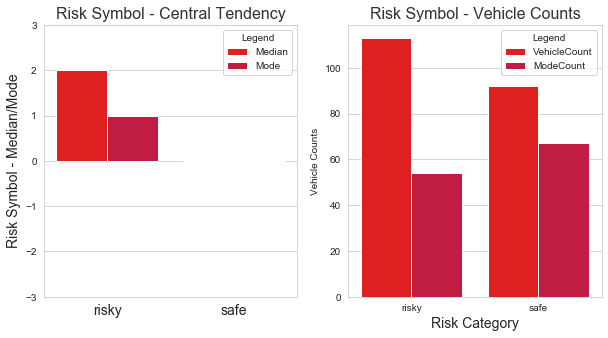

In [11]:
#palette = ["#FF0000","#FF4500","#DB7093", "#dd0033","#800000",  "#F08080"]
palette = ["#FF0000", "#dd0033"]
plot_color = "#dd0033"
title_color = "#333333"
left   =  0.10  # the left side of the subplots of the figure
right  =  0.95    # the right side of the subplots of the figure
bottom =  0.2    # the bottom of the subplots of the figure
top    =  0.3    # the top of the subplots of the figure
wspace =  0.1     # the amount of width reserved for blank space between subplots
hspace = 0.1 # the amount of height reserved for white space between subplots
y_title_margin = 1.0 # The amount of space above titles
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)
sns.set_style("whitegrid") #set seaborn style template
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1)
fig.patch.set_alpha(0.5)

ax[0].set_title('Risk Symbol - Central Tendency',y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)
ax[0].set_ylim(-3,3)
medplot=sns.barplot( x="RiskCategory",y="Value", data=riskcentraltend, palette=palette, hue='Legend',ax=ax[0])
medplot.set_ylabel("Risk Symbol - Median/Mode", fontsize=14)
medplot.set_xlabel("", fontsize=14)
medplot.set_xticklabels(medplot.get_xticklabels(), rotation=0, fontsize=14)

ax[1].set_title('Risk Symbol - Vehicle Counts',y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)    

bar2 = sns.barplot( x="RiskCategory",y="Value", data=riskcounts, palette=palette, hue='Legend', ax=ax[1])
bar2.set_ylabel('Vehicle Counts')
bar2.set_xlabel('Risk Category', fontsize=14)

fig.savefig('./graphs/riskysafe_medianmode.png',dpi=fig.dpi,bbox_inches='tight')

In [12]:
bsriskmedian = cars.groupby(['body-style','isrisky'])['symboling'].median().reset_index()
bsriskmedian['Legend'] = 'Median'
bsriskmedian.columns =  ['body-style','isrisky','Value', 'Legend']
#print(bsriskmedian)

bsriskmode = cars.groupby(['body-style','isrisky'])['symboling'].apply(lambda sym: stats.mode(sym)[0][0]).reset_index()
bsriskmode['Legend'] = 'Mode'
bsriskmode.columns = ['body-style','isrisky','Value', 'Legend']
#print(bsriskmode)

bsriskcount = cars.groupby(['body-style','isrisky'])['symboling'].count().reset_index()
bsriskcount['Legend'] = 'Vehicle Count'
bsriskcount.columns=['body-style','isrisky','Value', 'Legend']
#print(bsriskcount)

bsriskmodecount = cars.groupby(['body-style','isrisky'])['symboling'].apply(lambda sym: stats.mode(sym)[1][0]).reset_index()
bsriskmodecount['Legend'] = 'Mode Count'
bsriskmodecount.columns=['body-style','isrisky','Value', 'Legend']
#print(bsriskmodecount)

bsriskcentraltend = bsriskmedian.append(bsriskmode, ignore_index=False, verify_integrity=False, sort=False)
bsriskcounts = bsriskcount.append(bsriskmodecount,ignore_index=False, verify_integrity=False, sort=False)

#print(bsriskcentraltend)
#print(bsriskcounts)

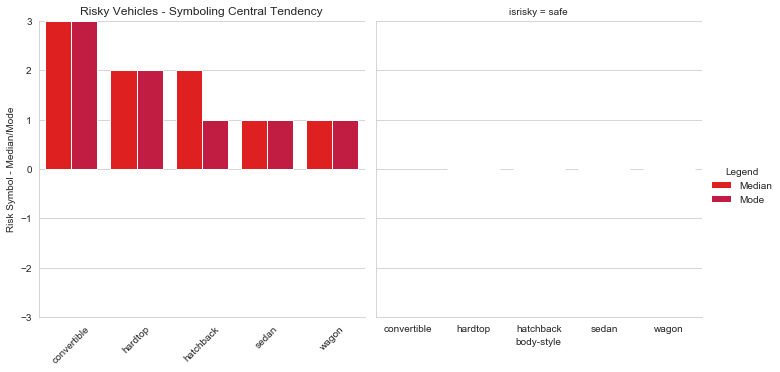

In [18]:

facet1=sns.factorplot(x="body-style",y="Value", hue="Legend", col="isrisky", data =bsriskcentraltend, kind="bar", palette=palette)
facet1.facet_axis(0,0).set_title("Risky Vehicles - Symboling Central Tendency")
facet1.facet_axis(0,0).set_ylim(-3,3)
facet1.facet_axis(0,0).set_ylabel("Risk Symbol - Median/Mode")
facet1.facet_axis(0,0).set_xlabel("")
facet1.facet_axis(0,0).patch.set_alpha(0)
facet1.facet_axis(0,0).set_xticklabels(facet1.facet_axis(0,0).get_xticklabels(), rotation=45)
facet1.fig.patch.set_alpha(0.5)

[Text(0, 0, 'convertible'),
 Text(1, 0, 'hardtop'),
 Text(2, 0, 'hatchback'),
 Text(3, 0, 'sedan'),
 Text(4, 0, 'wagon')]

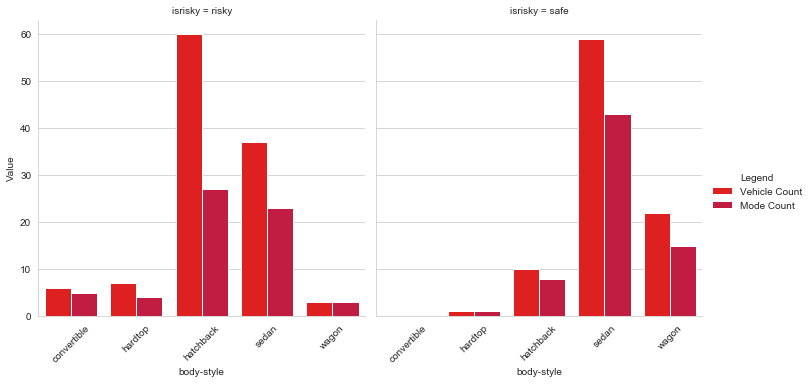

In [13]:
facet1c=sns.factorplot(x="body-style",y="Value", hue="Legend", col="isrisky", data =bsriskcounts, kind="bar", palette=palette, )
facet1c.facet_axis(0,0).set_xticklabels(facet1c.facet_axis(0,0).get_xticklabels(), rotation=45)
facet1c.facet_axis(0,1).set_xticklabels(facet1c.facet_axis(0,1).get_xticklabels(), rotation=45)

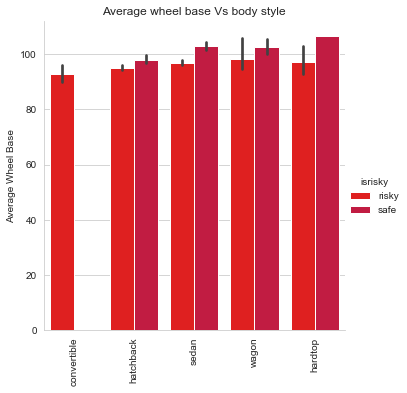

In [14]:
wbase = cars[['isrisky','body-style','wheel-base']].groupby(['isrisky','body-style'],as_index=False)['wheel-base'].mean()
wbase=wbase.sort_values('wheel-base')
wbase.reset_index(inplace=True,drop=True)
facet3=sns.factorplot(x="body-style",y="wheel-base", data=cars, hue="isrisky", kind="bar", palette=palette)
facet3.ax.set_title('Average wheel base Vs body style')
facet3.ax.set_xlabel('')
facet3.ax.set_ylabel('Average Wheel Base')
facet3.ax.set_xticklabels(facet3.ax.get_xticklabels(), rotation=90)
facet3.ax.patch.set_alpha(0)
facet3.fig.patch.set_alpha(0.5)
facet3.fig.savefig('./graphs/wbase_bodystyle.png',dpi=facet3.fig.dpi,bbox_inches='tight')
# Print values on top of bars
#for p in facet3.ax.patches:
#    ypos=p.get_height()
#    xpos=(p.get_x() + p.get_width()/2.0) #center of the bar
#    facet3.ax.text(xpos,ypos, '{:1.2f}'.format(ypos) , ha="center")
plt.show()

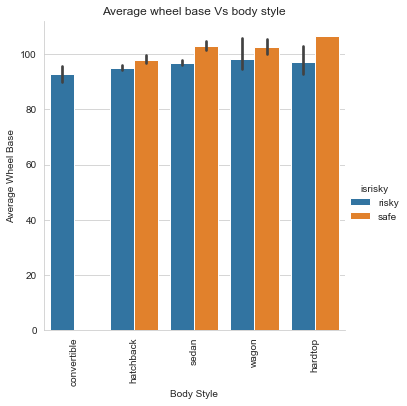

In [15]:
facet4=sns.factorplot(x="body-style",y="wheel-base", data=cars, hue="isrisky", kind="bar")
facet4.ax.set_title('Average wheel base Vs body style')
facet4.ax.set_xlabel('Body Style')
facet4.ax.set_ylabel('Average Wheel Base')
facet4.ax.set_xticklabels(facet4.ax.get_xticklabels(), rotation=90)
# Print values on top of bars
#for p in facet3.ax.patches:
#    ypos=p.get_height()
#    xpos=(p.get_x() + p.get_width()/2.0) #center of the bar
#    facet3.ax.text(xpos,ypos, '{:1.2f}'.format(ypos) , ha="center")
plt.show()

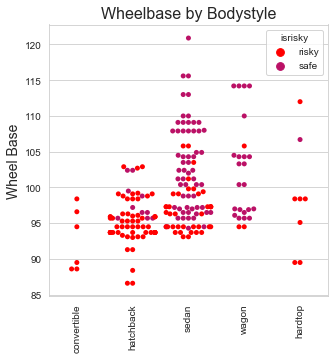

In [20]:
palette=["#FF0000","#bb1166"]
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Wheelbase by Bodystyle", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)
gax=sns.swarmplot(x="body-style",y="wheel-base",hue="isrisky",data=cars,palette=palette)
gax.set_ylabel('Wheel Base',fontsize=14 )
gax.set_xlabel('',fontsize=14)
gax.set_xticklabels(gax.get_xticklabels(), rotation=90)
fig.savefig('./graphs/wbase_bodystyle_swarm.png',dpi=fig.dpi,bbox_inches='tight')

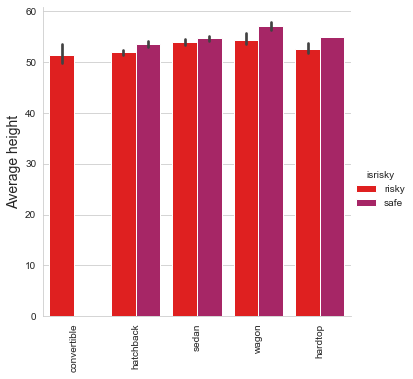

In [21]:
facet5=sns.factorplot(x="body-style",y="height", data=cars,kind="bar",hue="isrisky", palette=palette)
facet5.set_titles('Average height Vs body style')
facet5.set_xlabels('', fontsize=14)
facet5.set_ylabels('Average height', fontsize=14)
facet5.ax.set_xticklabels(facet5.ax.get_xticklabels(), rotation=90)

facet5.ax.patch.set_alpha(0)
facet5.fig.patch.set_alpha(0.5)

facet5.fig.savefig('./graphs/height_bodystyle.png',dpi=facet5.fig.dpi,bbox_inches='tight')
# Print values on top of bars

#facet6=sns.factorplot(x="body-style",y="height", data=cars,kind="point",hue="isrisky")
#facet6.set_titles('Average height Vs body style')
#facet6.set_xlabels('Body Style')
#facet6.set_ylabels('Average height')
#facet6.ax.set_xticklabels(facet6.ax.get_xticklabels(), rotation=90)
plt.show()


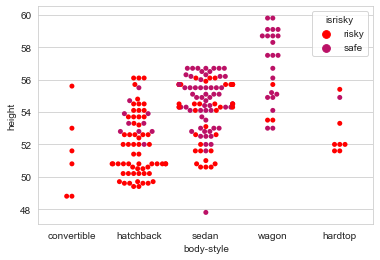

In [22]:
sns.swarmplot(x="body-style",y="height",hue="isrisky",data=cars,palette=palette)

<Figure size 432x288 with 0 Axes>

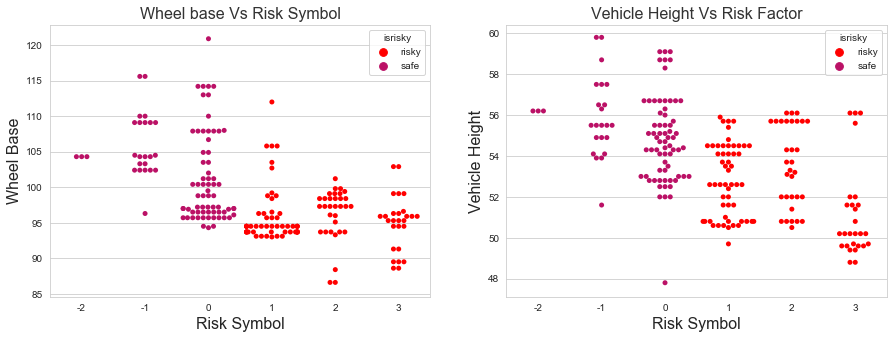

In [23]:
palette=["#FF0000","#bb1166"]
#Correlation between - wheel-base | height | num_doors | symboling 
sns.set_style("whitegrid") #set seaborn style template

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  0.1, 
    right   =  right, 
    top     =  0.6, 
    wspace  =  0.2, 
    hspace  =  0.8
)

fig, ax = plt.subplots(figsize=(15,5), ncols=2, nrows=1) # get the figure and axes objects for a 3x2 subplot figure
fig.patch.set_alpha(0.5)

ax[0].set_title("Wheel base Vs Risk Symbol", y = y_title_margin, color=title_color,fontsize=16)
ax[0].patch.set_alpha(0)

ax[0].set_xlim(-3,3)
#fe_enginesize_reg=sns.regplot(x="symboling", y="wheel-base",data = cars, ax=ax[0], scatter_kws={"color":"#dd0033"}, line_kws={"color":"#ff0800"},marker='o', order=1)
fe_enginesize_reg=sns.swarmplot(x="symboling", y="wheel-base",data = cars, ax=ax[0], hue="isrisky",palette=palette)
fe_enginesize_reg.set_ylabel('Wheel Base', fontsize=16)
fe_enginesize_reg.set_xlabel('Risk Symbol', fontsize=16)


ax[1].set_title("Vehicle Height Vs Risk Factor", y = y_title_margin, color=title_color,fontsize=16)
ax[1].patch.set_alpha(0)

fe_price_reg=sns.swarmplot(x="symboling", y="height",data = cars, ax=ax[1], hue="isrisky", palette=palette)
fe_price_reg.set_ylabel('Vehicle Height', fontsize=16)
fe_price_reg.set_xlabel('Risk Symbol', fontsize=16)

#plt.show()
fig.savefig('./graphs/wbase_symbol_height.png',dpi=fig.dpi,bbox_inches='tight')

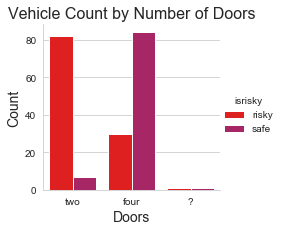

In [25]:
#Number of Doors
facet7a=sns.factorplot(x="num-of-doors", data=cars, hue="isrisky", kind="count", size=3, palette=palette )
facet7a.axes[0,0].set_title("Vehicle Count by Number of Doors", fontsize=16)
facet7a.axes[0,0].set_ylabel("Count", fontsize=14)
facet7a.axes[0,0].set_xlabel("Doors", fontsize=14)
facet7a.axes[0,0].patch.set_alpha(0)
facet7a.fig.patch.set_alpha(0.5)
facet7a.fig.savefig('./graphs/numdoors_count.png',dpi=facet7a.fig.dpi,bbox_inches='tight')

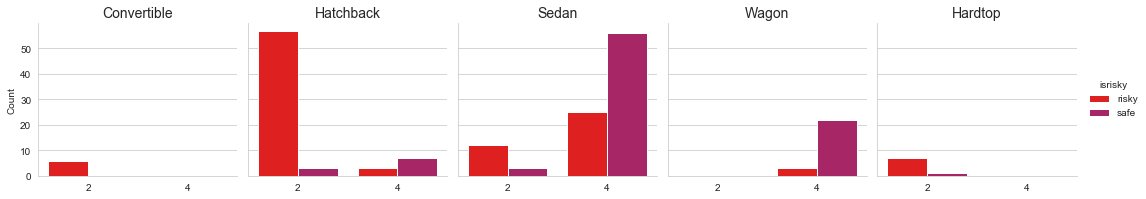

In [31]:
cars['numdoors'] = cars['num-of-doors'].map({"two":2,"four":4, "?":4})
cardoors = cars[['body-style','numdoors','isrisky']].groupby(['body-style','isrisky'])
cardoorsmd = cardoors['numdoors'].apply(lambda nd: stats.mode(nd)[0][0]).reset_index()

facet7=sns.factorplot(x="numdoors", data=cars, hue="isrisky", kind="count", col="body-style", col_wrap=5, size=3, palette=palette )
facet7.set_titles('Number of Doors Vs Body style')
#facet7.set_xlabels('Number of Doors')
facet7.set_ylabels('Count')
#facet7.ax.set_xticklabels(facet7.ax.get_xticklabels(), rotation=90)
facet7.axes[0].set_title("Convertible", fontsize=14)
facet7.axes[1].set_title("Hatchback", fontsize=14)
facet7.axes[2].set_title("Sedan", fontsize=14)
facet7.axes[3].set_title("Wagon", fontsize=14)
facet7.axes[4].set_title("Hardtop", fontsize=14)

for ax in facet7.axes:
    ax.patch.set_alpha(0)
    ax.set_xlabel("")
facet7.fig.patch.set_alpha(0.5)    
facet7.fig.savefig('./graphs/numdoors_bodystyle.png',dpi=facet7.fig.dpi,bbox_inches='tight')
#plt.show()

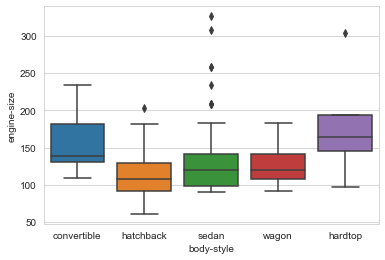

In [32]:
#Engine Size

sns.boxplot(x="body-style",y="engine-size",data=cars)

In [26]:
import collections as cl

def detect_outliers(df,n,features):
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
    outlier_indices = cl.Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v >= n )
    
    return multiple_outliers  

outlier_records = detect_outliers(cars,1,["engine-size"])
#cars.iloc[[15, 16, 17, 47, 48, 49, 71, 72, 73, 74],:][['make','body-style','engine-size']]
carseng=cars.drop(outlier_records, axis=0).reset_index(drop=True)

[Text(0, 0, 'sporty'), Text(1, 0, 'other')]

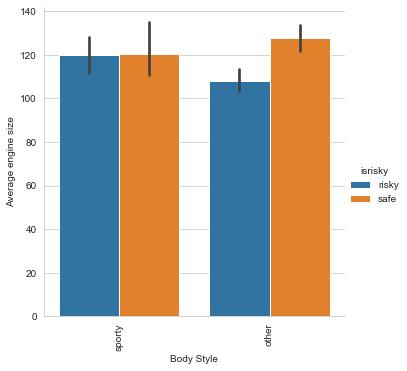

In [27]:
def marksporty(x):
    if(x == 'convertible' or x == 'hardtop' or x == 'hatchback'):
        return "sporty"
    return "other"

carseng['sporty'] = carseng['body-style'].apply(lambda x: marksporty(x))

facet9=sns.factorplot(x="sporty",y="engine-size", data=carseng,kind="bar",hue="isrisky")
facet9.set_titles('Average engine size Vs body style')
facet9.set_xlabels('Body Style')
facet9.set_ylabels('Average engine size')
facet9.ax.set_xticklabels(facet9.ax.get_xticklabels(), rotation=90)

In [28]:
#Horsepower
def impute_groupmean(df,grpby,feature):
    #grpby='body-style'
    #feature = 'horsepower'
    #print(type(df))
    df=df.merge(df.groupby(by=grpby, as_index=False)[feature].mean(), left_on=grpby, right_on=grpby, how="inner", suffixes=['', '_right'])
    df[feature] = np.where(df[feature].isnull(),df[feature+'_right'],df[feature])
    df.drop(feature+'_right', axis=1, inplace=True)
    return df

In [29]:
#ConVert non-numeric horsepower alues to NaNs
cars['horsepower'] = pd.to_numeric(cars['horsepower'], errors='coerce')
cars['hp'] = cars['horsepower']
#cars[pd.isna(cars['horsepower'])]
cars=impute_groupmean(cars,'body-style','horsepower')
cars[pd.isna(cars['hp'])]

#cars.iloc[[130,131]]
#outlier_indices = detect_outliers(cars,1,['horsepower'])
#outlier_indices

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,volume,isrisky,isrisky10,hp
54,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.9,8.7,101.333333,?,23,31,9895,594631.44,risky,1,NaN
184,0,?,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,97.750000,?,23,31,9295,666250.20,safe,0,NaN


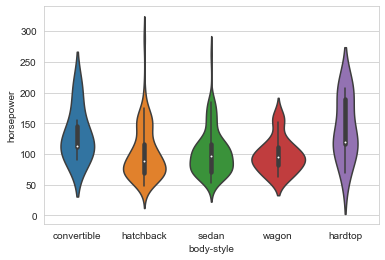

In [30]:
sns.violinplot(x="body-style",y="horsepower",data=cars)

In [31]:
outlier_indices = detect_outliers(cars,1,['horsepower'])
cars.iloc[outlier_indices]
carshp=cars.drop(outlier_indices, axis=0).reset_index(drop=True)

[Text(0, 0, 'sporty'), Text(1, 0, 'other')]

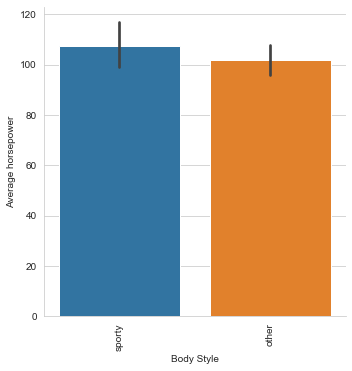

In [32]:
#carshp['sporty'] = carshp['body-style'].apply(lambda x: marksporty(x))
cars['sporty'] = cars['body-style'].apply(lambda x: marksporty(x))
facet10=sns.factorplot(x="sporty",y="horsepower", data=cars,kind="bar")
facet10.set_titles('Average horsepower Vs body style')
facet10.set_xlabels('Body Style')
facet10.set_ylabels('Average horsepower')
facet10.ax.set_xticklabels(facet10.ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'sporty'), Text(1, 0, 'other')]

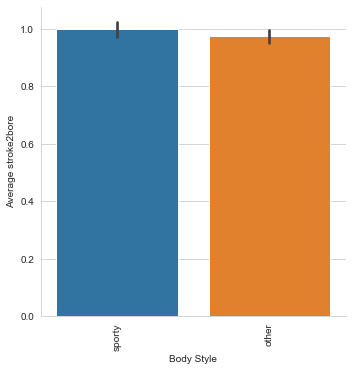

In [33]:
cars['stroke'] = pd.to_numeric(cars['stroke'], errors='coerce')
cars['bore'] = pd.to_numeric(cars['bore'], errors='coerce')
cars['stroke2bore'] = cars['stroke']/cars['bore']

facet11=sns.factorplot(x="sporty",y="stroke2bore", data=cars,kind="bar")
facet11.set_titles('Average stroke2bore Vs body style')
facet11.set_xlabels('Body Style')
facet11.set_ylabels('Average stroke2bore')
facet11.ax.set_xticklabels(facet11.ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'sporty'), Text(1, 0, 'other')]

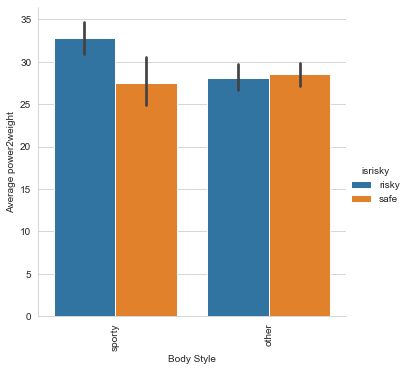

In [34]:
#Power to Weight ratio
#cars['horsepower'] = pd.to_numeric(cars['horsepower'], errors='coerce')
#cars['curb-weight'] = pd.to_numeric(cars['curb-weight'], errors='coerce')
cars['power2weight'] = (cars['horsepower']/0.001341) / cars['curb-weight']
#carshp['power2weight'] = (carshp['horsepower']/0.001341) / carshp['curb-weight']

#print(cars['power2weight'].head())

#facet12=sns.factorplot(x="sporty",y="power2weight", data=carshp,kind="bar",hue="isrisky")
facet12=sns.factorplot(x="sporty",y="power2weight", data=cars,kind="bar",hue="isrisky")
facet12.set_titles('Average power2weight Vs body style')
facet12.set_xlabels('Body Style')
facet12.set_ylabels('Average power2weight')
facet12.ax.set_xticklabels(facet12.ax.get_xticklabels(), rotation=90)

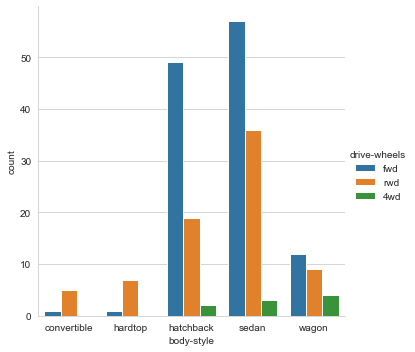

In [37]:
#Drive wheels
cars['drwheel'] = cars['drive-wheels'].map({"rwd": 1, "fwd": 2, "4wd": 3})

carsdrv=cars.groupby(by=['body-style','drive-wheels'],as_index=False)['drive-wheels'].size().reset_index(name="count")
carsdrv

sns.factorplot(x='body-style',y='count', data=carsdrv, hue="drive-wheels", kind="bar")

In [38]:
cars.groupby(["drive-wheels","body-style"])['body-style'].count()

drive-wheels  body-style 
4wd           hatchback       2
              sedan           3
              wagon           4
fwd           convertible     1
              hardtop         1
              hatchback      49
              sedan          57
              wagon          12
rwd           convertible     5
              hardtop         7
              hatchback      19
              sedan          36
              wagon           9
Name: body-style, dtype: int64

In [39]:
#Price
cars['price'] = pd.to_numeric(cars['price'], errors='coerce')
cars['price-bkp'] = cars['price']
#cars[pd.isna(cars['horsepower'])]
cars=impute_groupmean(cars,'body-style','price')
cars[pd.isna(cars['price-bkp'])]


#sns.swarmplot(x="sporty",y="price",data=cars, hue="isrisky")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,volume,isrisky,isrisky10,hp,sporty,stroke2bore,power2weight,drwheel,price-bkp
7,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160.0,5500,16,22,9957.441176,629188.560,safe,0,160.0,sporty,1.086262,39.080886,3,NaN
53,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288.0,5750,17,28,9957.441176,641507.055,risky,1,288.0,sporty,0.789340,63.804249,1,NaN
99,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400,38,43,14459.755319,515592.480,risky,1,70.0,other,1.026403,27.854776,2,NaN
100,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70.0,5400,38,43,14459.755319,515592.480,safe,0,70.0,other,1.026403,27.344081,2,NaN


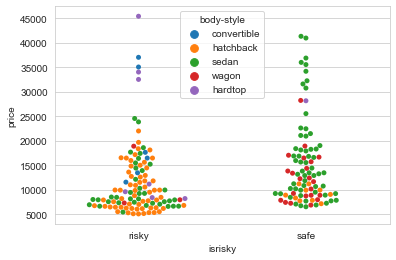

In [40]:
sns.swarmplot(x="isrisky",y="price",data=cars, hue="body-style")

Price do not seem to have any contribution to symboling values

In [41]:
#Number of cylinders

def calc_num_cylinders(cylstr):
    cyls = {'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12}
    if(cylstr in cyls.keys()):
        return cyls[cylstr]
    return 0

cars['num_cylinders'] = cars['num-of-cylinders'].apply(lambda x: calc_num_cylinders(x))

def calc_num_doors (doorstr):
    if(doorstr == 'two'):
       return 2 
    if (doorstr =='four'):
       return 4
    return 0
       
cars['num_doors'] = cars['num-of-doors'].apply(lambda x: calc_num_doors (x))

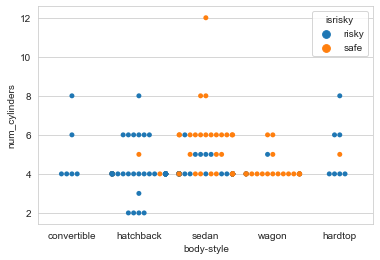

In [42]:
sns.swarmplot(x="body-style",y="num_cylinders",data=cars, hue="isrisky")

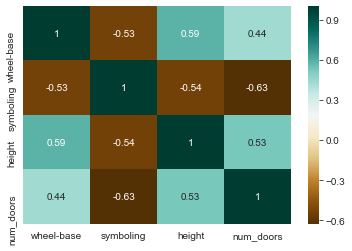

In [44]:
sns.heatmap(cars[['wheel-base','symboling','height', 'num_doors']].corr(),cmap="BrBG",annot=True)

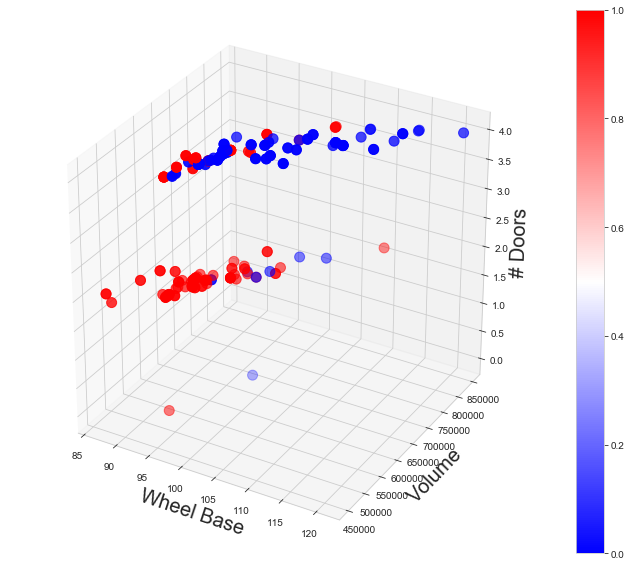

In [46]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pylab 

fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(111, projection='3d')


x = cars['wheel-base']
y = cars['height']
y = cars['volume']
z = cars['num_doors']
color = cars['isrisky10']


cb1=ax.scatter(x, y, z, c=color, cmap=plt.cm.get_cmap('bwr'),s=100)
plt.colorbar(cb1, ax=ax)
ax.set_xlabel('Wheel Base',fontsize=20)
ax.set_ylabel('Volume',fontsize=20)
ax.set_zlabel('# Doors',fontsize=20)
ax.patch.set_alpha(0)
fig.patch.set_alpha(0.5)

fig.savefig('./graphs/wheelbase_volume_doors.png',dpi=fig.dpi,bbox_inches='tight')

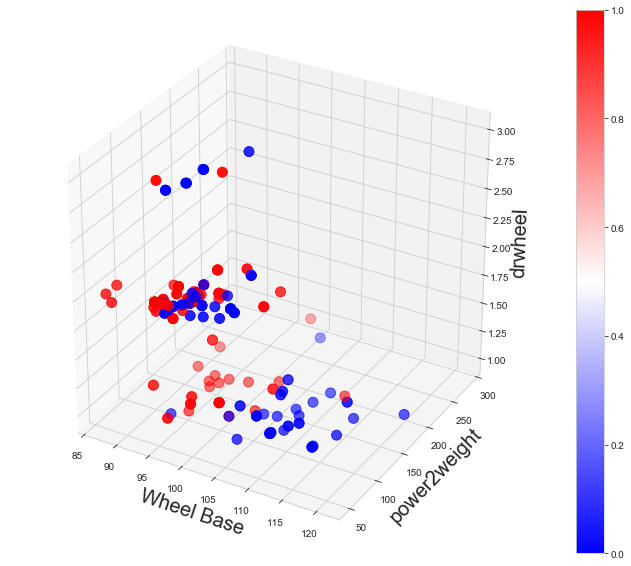

In [47]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pylab 

fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(111, projection='3d')


x = cars['wheel-base']
y = cars['horsepower']
z = cars['drwheel']    #{"rwd": 1, "fwd": 2, "4wd": 3}
color = cars['isrisky10']


cb1=ax.scatter(x, y, z, c=color, cmap=plt.cm.get_cmap('bwr'),s=100)
plt.colorbar(cb1, ax=ax)
ax.set_xlabel('Wheel Base',fontsize=20)
ax.set_ylabel('power2weight',fontsize=20)
ax.set_zlabel('drwheel',fontsize=20)


plt.show()

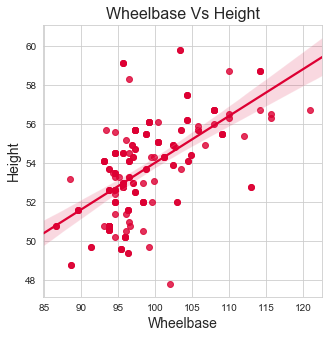

In [48]:
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) 
ax.set_title("Wheelbase Vs Height", fontsize=16)
fig.patch.set_alpha(0.5)
ax.patch.set_alpha(0)

gax=sns.regplot(x='wheel-base', y='height', data=cars, color=plot_color)
gax.set_ylabel('Height', fontsize=14)
gax.set_xlabel('Wheelbase',fontsize=14)
fig.savefig('./graphs/enginesize_02_horsepower.png',dpi=fig.dpi,bbox_inches='tight')

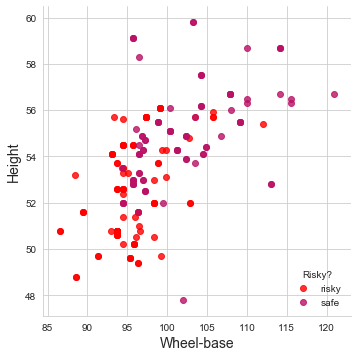

In [49]:
gax=sns.lmplot('wheel-base', 'height', data=cars, fit_reg=False, hue="isrisky", palette=palette,legend=False)

gax.facet_axis(0,0).patch.set_alpha(0)
gax.fig.patch.set_alpha(0.5)

gax.set_ylabels('Height',fontsize=14 )
gax.set_xlabels('Wheel-base',fontsize=14)
gax.facet_axis(0,0).legend(loc="lower right",framealpha=0, title="Risky?")
gax.fig.savefig('./graphs/wheelbase_height_scatter.png',dpi=gax.fig.dpi,bbox_inches='tight')

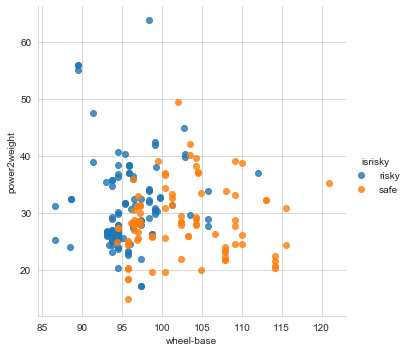

In [50]:
sns.lmplot('wheel-base', 'power2weight', data=cars, fit_reg=False, hue="isrisky")


In [53]:
allvars=cars.groupby(by='symboling',as_index=False)['wheel-base','height','power2weight','horsepower','volume'].mean()
allvars = allvars.melt('symboling',var_name='cols',  value_name='vals')
#allvars

ndoormode = cars.groupby('symboling')['num_doors'].apply(lambda sym: stats.mode(sym)[0][0]).reset_index()
ndoormode.columns=['symboling','vals']
ndoormode['cols'] = 'num_doors'

#symboling	cols	vals

allvars=allvars.append(ndoormode[['symboling','cols','vals']], ignore_index=False, verify_integrity=False)
allvars.reset_index(drop=True, inplace=True)
allvars['vals'] = np.log(allvars['vals'])

allvars

,symboling,cols,vals
0,-2,wheel-base,4.647271
1,-1,wheel-base,4.664082
2,0,wheel-base,4.616302
3,1,wheel-base,4.563441
4,2,wheel-base,4.566819
5,3,wheel-base,4.553799
6,-2,height,4.028917
7,-1,height,4.023646
8,0,height,4.003309
9,1,height,3.966757


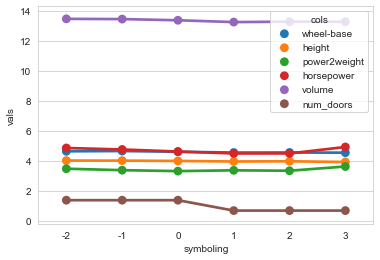

In [54]:
sns.pointplot(x='symboling', y='vals', hue='cols',data=allvars)

In [55]:
cars[['num_cylinders','wheel-base','length','height','width','engine-size','num_doors','stroke','bore','compression-ratio','horsepower','peak-rpm','curb-weight','city-mpg']].corr()

,num_cylinders,wheel-base,length,height,width,engine-size,num_doors,stroke,bore,compression-ratio,horsepower,curb-weight,city-mpg
num_cylinders,1.000000,0.339507,0.430672,-0.013995,0.545007,0.846031,-0.005378,0.008578,0.243553,-0.020002,0.691565,0.609727,-0.445837
wheel-base,0.339507,1.000000,0.874587,0.589435,0.795144,0.569329,0.437162,0.161477,0.490378,0.249786,0.352445,0.776386,-0.470414
length,0.430672,0.874587,1.000000,0.491029,0.841118,0.683360,0.389620,0.129739,0.607480,0.158414,0.553822,0.877728,-0.670909
height,-0.013995,0.589435,0.491029,1.000000,0.279210,0.067149,0.528343,-0.056999,0.176195,0.261214,-0.110137,0.295572,-0.048640
width,0.545007,0.795144,0.841118,0.279210,1.000000,0.735433,0.202903,0.182956,0.559204,0.181129,0.641805,0.867032,-0.642704
engine-size,0.846031,0.569329,0.683360,0.067149,0.735433,1.000000,0.028701,0.206675,0.594090,0.028971,0.810505,0.850594,-0.653658
num_doors,-0.005378,0.437162,0.389620,0.528343,0.202903,0.028701,1.000000,-0.023098,0.122102,0.116988,-0.102841,0.200148,-0.041322
stroke,0.008578,0.161477,0.129739,-0.056999,0.182956,0.206675,-0.023098,1.000000,-0.055909,0.186170,0.085985,0.168929,-0.042906
bore,0.243553,0.490378,0.607480,0.176195,0.559204,0.594090,0.122102,-0.055909,1.000000,0.005203,0.576017,0.649045,-0.594584
compression-ratio,-0.020002,0.249786,0.158414,0.261214,0.181129,0.028971,0.116988,0.186170,0.005203,1.000000,-0.205299,0.151362,0.324701


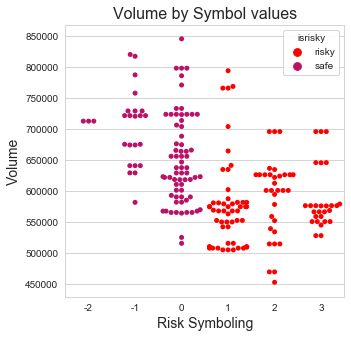

In [56]:
#Interior Volume
palette=["#FF0000","#bb1166"]
fig, ax = plt.subplots(figsize=(5,5), ncols=1, nrows=1) # get the figure and axes objects 

fig.patch.set_alpha(0.5)
ax.set_title("Volume by Symbol values", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)
gax=sns.swarmplot(x="symboling", y="volume", data=cars, hue="isrisky",palette=palette, ax=ax)
gax.set_ylabel('Volume',fontsize=14 )
gax.set_xlabel('Risk Symboling',fontsize=14)
#gax.set_xticklabels(gax.get_xticklabels(), rotation=90)
fig.savefig('./graphs/Volume_symboling_swarm.png',dpi=fig.dpi,bbox_inches='tight')